In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data_xl = pd.ExcelFile("Processed_table.xlsx")
data = data_xl.parse(data_xl.sheet_names[0])
data.head(14)

,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0,Кластер 0,several animated buried,5.772342,12.564796,1260,red
1,eligibility,0,Кластер 0,singles unusual buyers,14.829280,7.850729,866,red
2,eligibility,0,Кластер 0,dynamics directly,9.980149,6.281428,1146,red
3,eligibility,1,Кластер 1,decision surgeons montreal,3.283940,4.396741,823,blue
4,eligibility,1,Кластер 1,knives everybody,5.607192,13.155189,1377,blue
5,eligibility,1,Кластер 1,lighting observe,11.419919,3.161711,281,blue
6,eligibility,1,Кластер 1,payday oriental,8.035720,2.965695,1501,blue
7,eligibility,1,Кластер 1,vampire injured,5.247683,0.779161,278,blue
8,eligibility,2,Кластер 2,heavily responsible,4.783522,7.172435,309,green
9,eligibility,2,Кластер 2,alternative homeless,14.927879,10.281613,129,green


Для минимизации наложения текста ищу максимально похожие области отображения на груфике и групиррую по одинаковому отступу

In [3]:
group_1 = ['eligibility', 'capability', 'twisted', 'dialog', 'available',]
indent_g_1 = {'red': {'x': +.25, 'y': -.4},
            'blue':{'x': +.25, 'y': -.4},
            'green': {'x': -.25, 'y': -.9},
            'yellow': {'x': -.25, 'y': +.1}}

group_2 = [ 'protein', 'winner', 'personnel', 'except',]
indent_g_2 = {'red': {'x': +.25, 'y': -.51},
            'blue':{'x': +.1, 'y': -.1},
            'green': {'x': +.2, 'y': -.08},
            'yellow': {'x': -.5, 'y': -.7}}

group_3 = ['greetings',  'worlds', 'ar\\vr', 'lithuania',]
indent_g_3 = {'red': {'x': +.25, 'y': -.51},
            'blue':{'x': +.1, 'y': -.13},
            'green': {'x': +.2, 'y': -.4},
            'yellow': {'x': -.5, 'y': -.0}}

group_4 = ['locator',  'housewives']
indent_g_4 = {'red': {'x': +.25, 'y': -.4},
            'blue':{'x': -.7, 'y': -.7},
            'green': {'x': -.1, 'y': -.7},
            'yellow': {'x': +.2, 'y': -.2}}

In [4]:
list_area = data.area.unique()

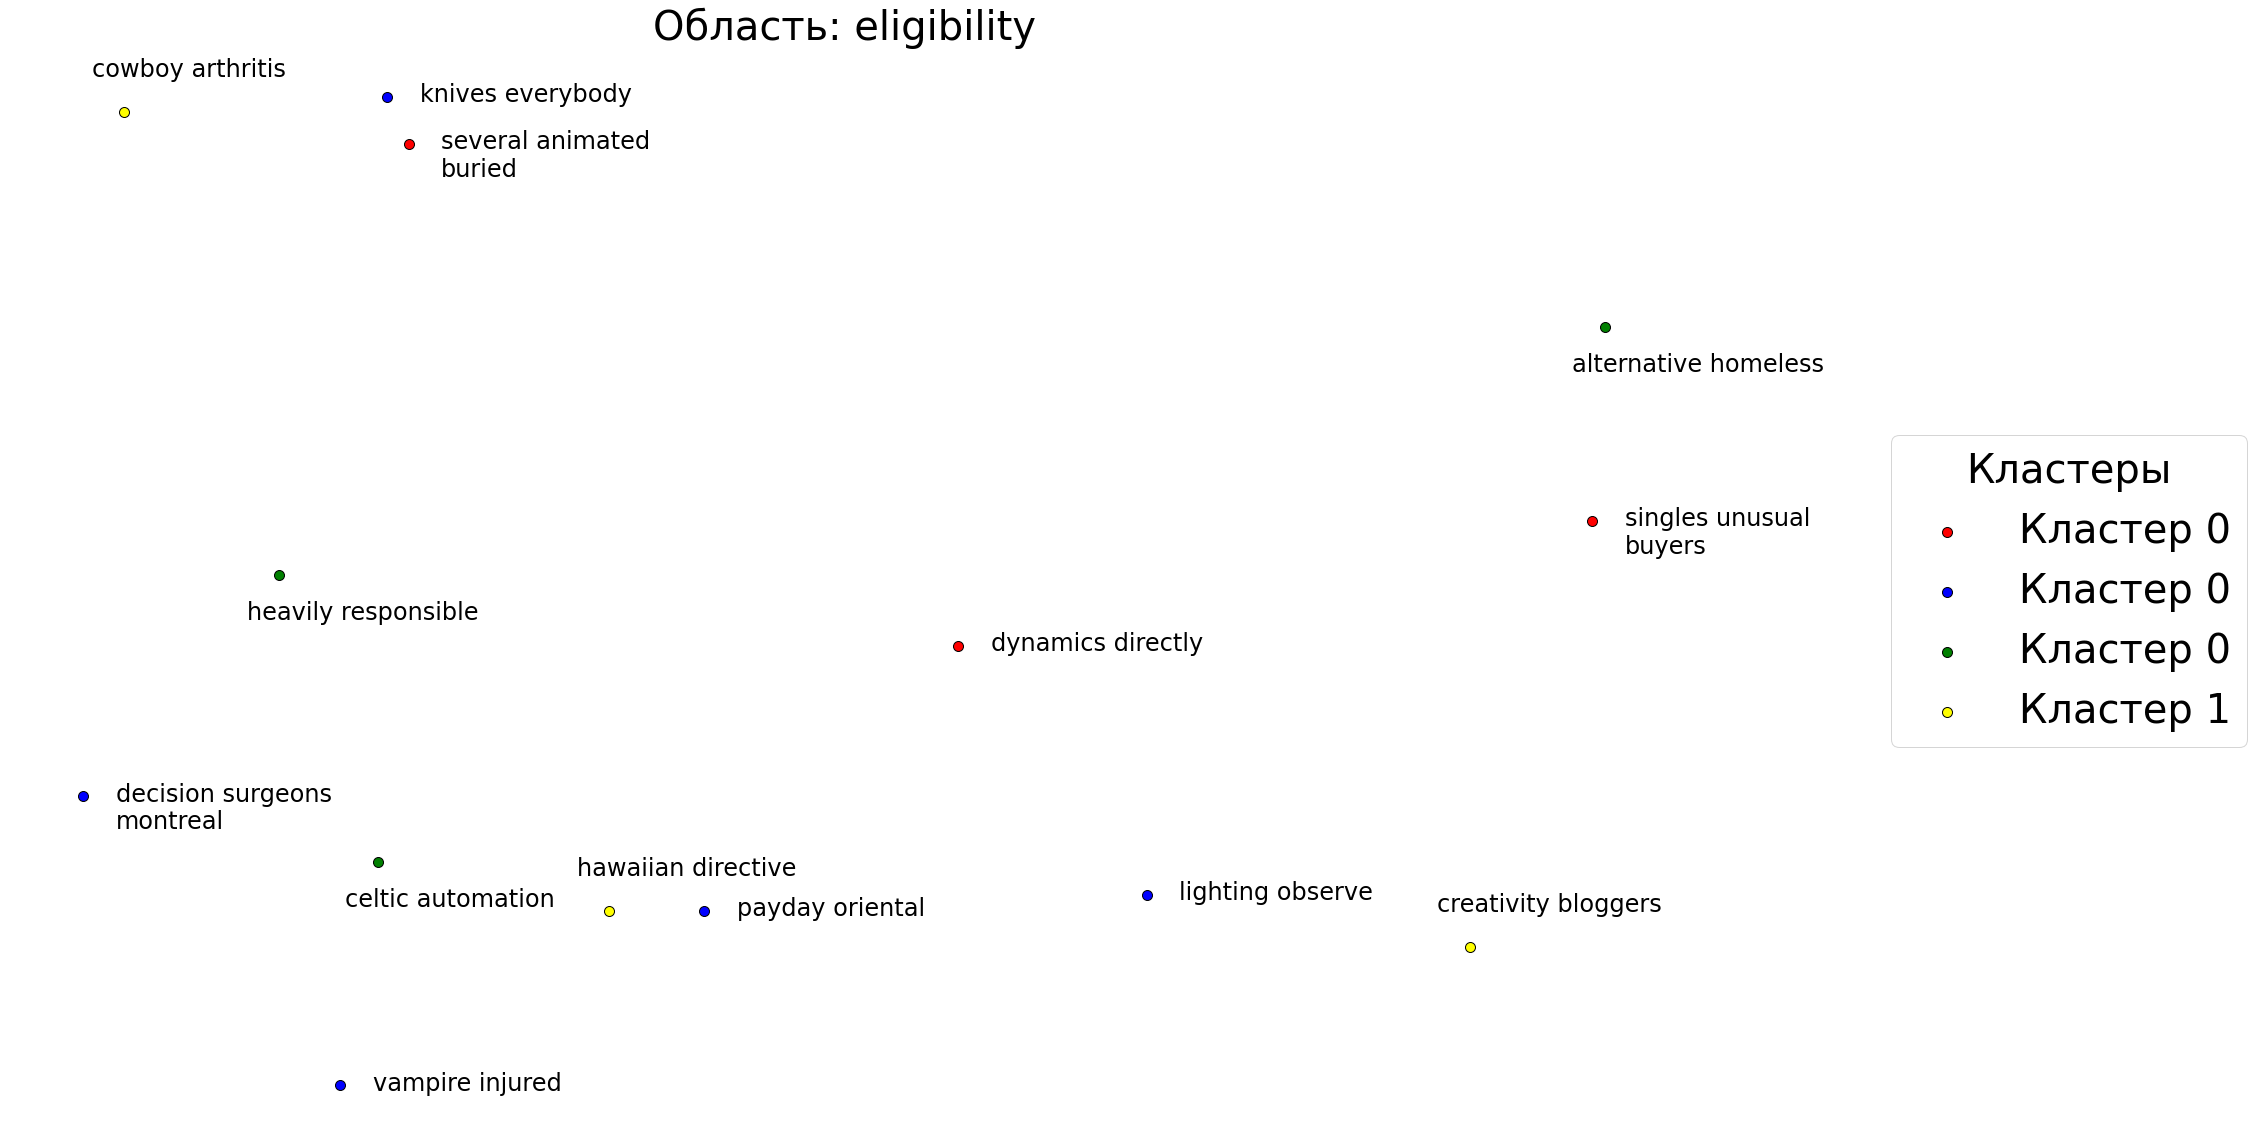

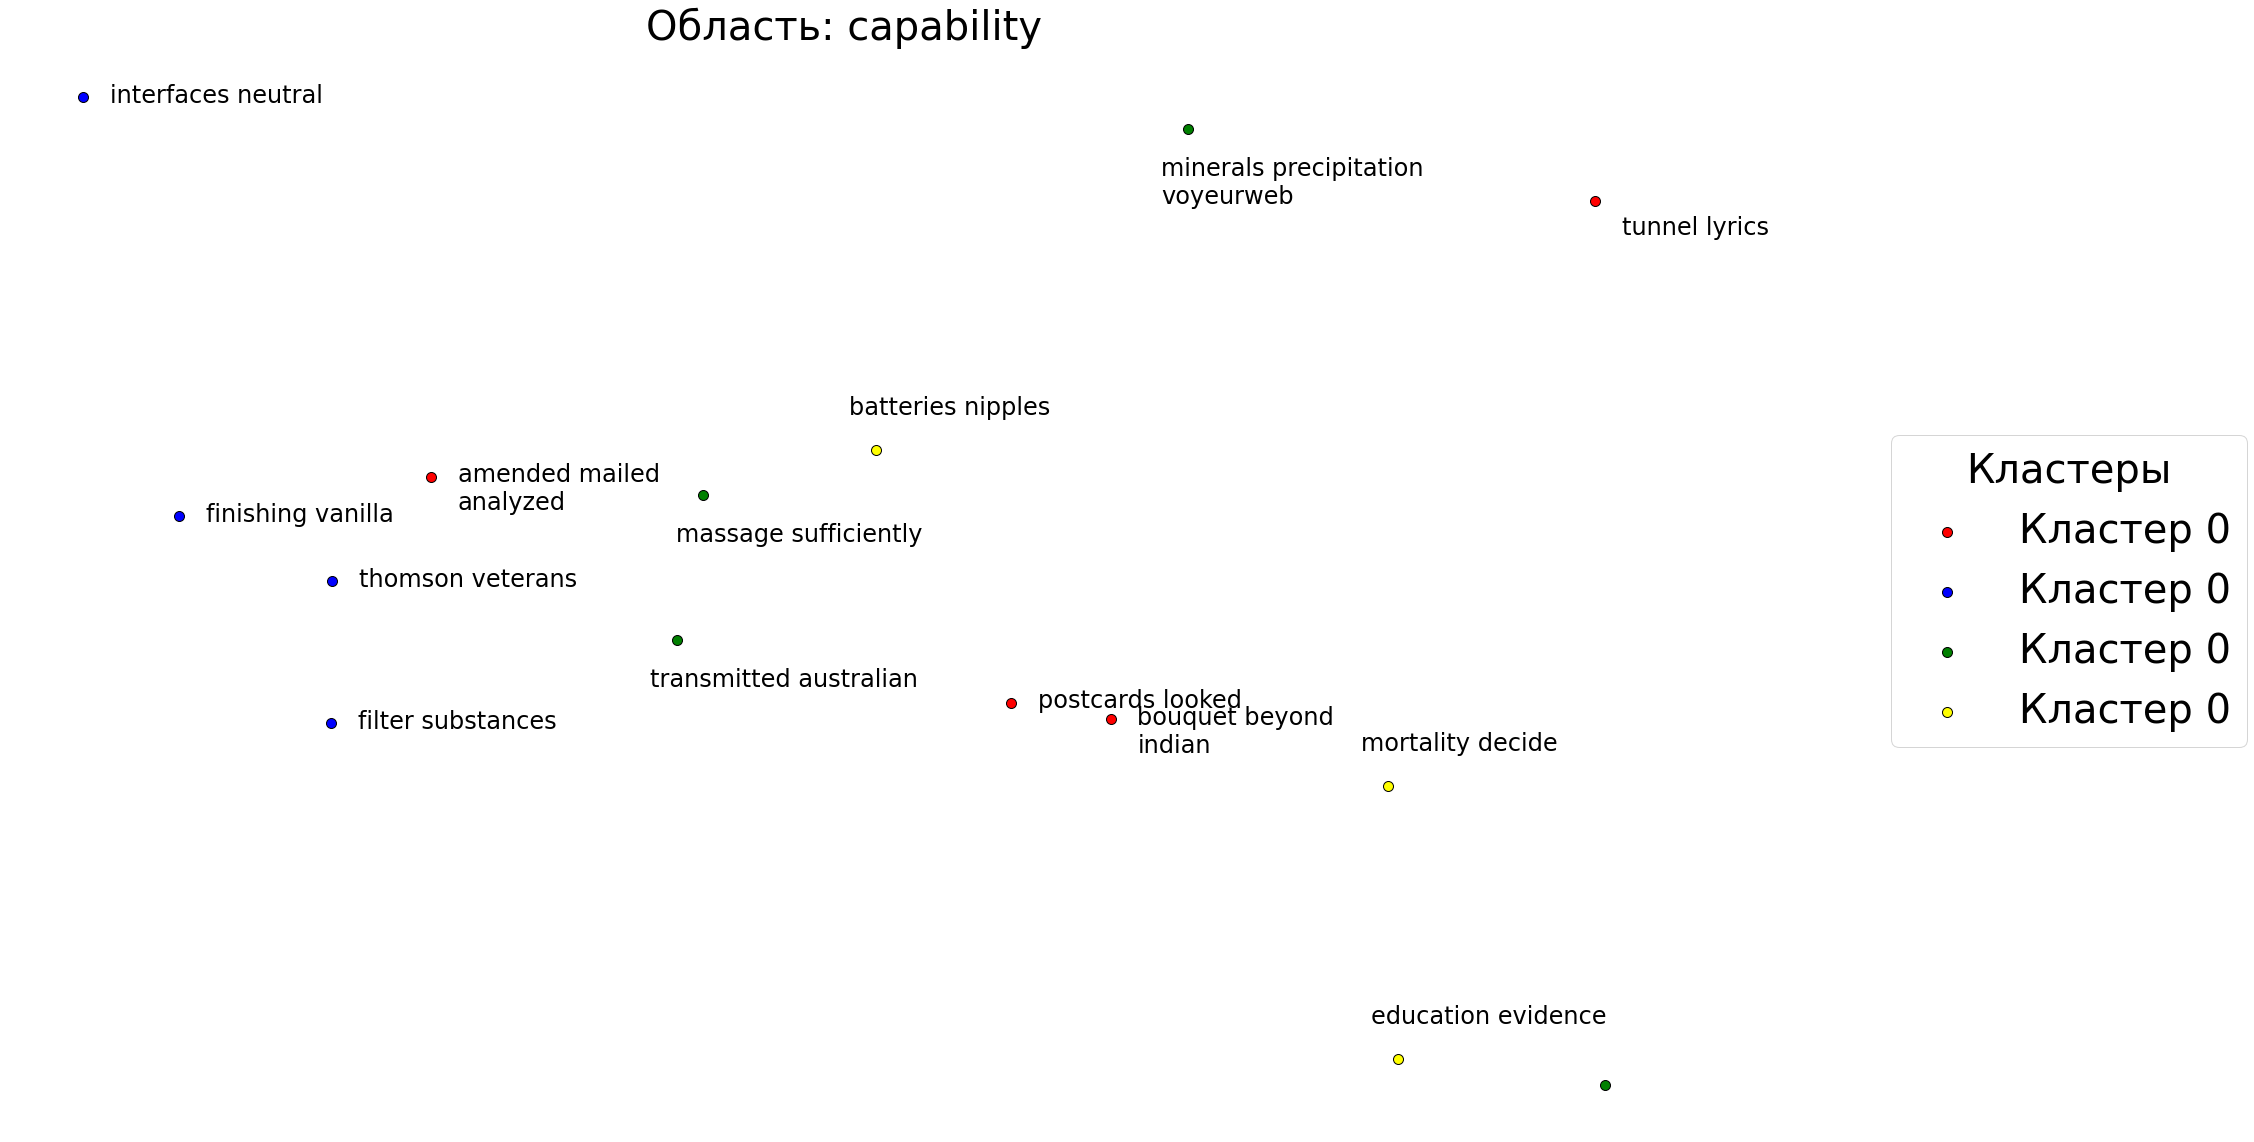

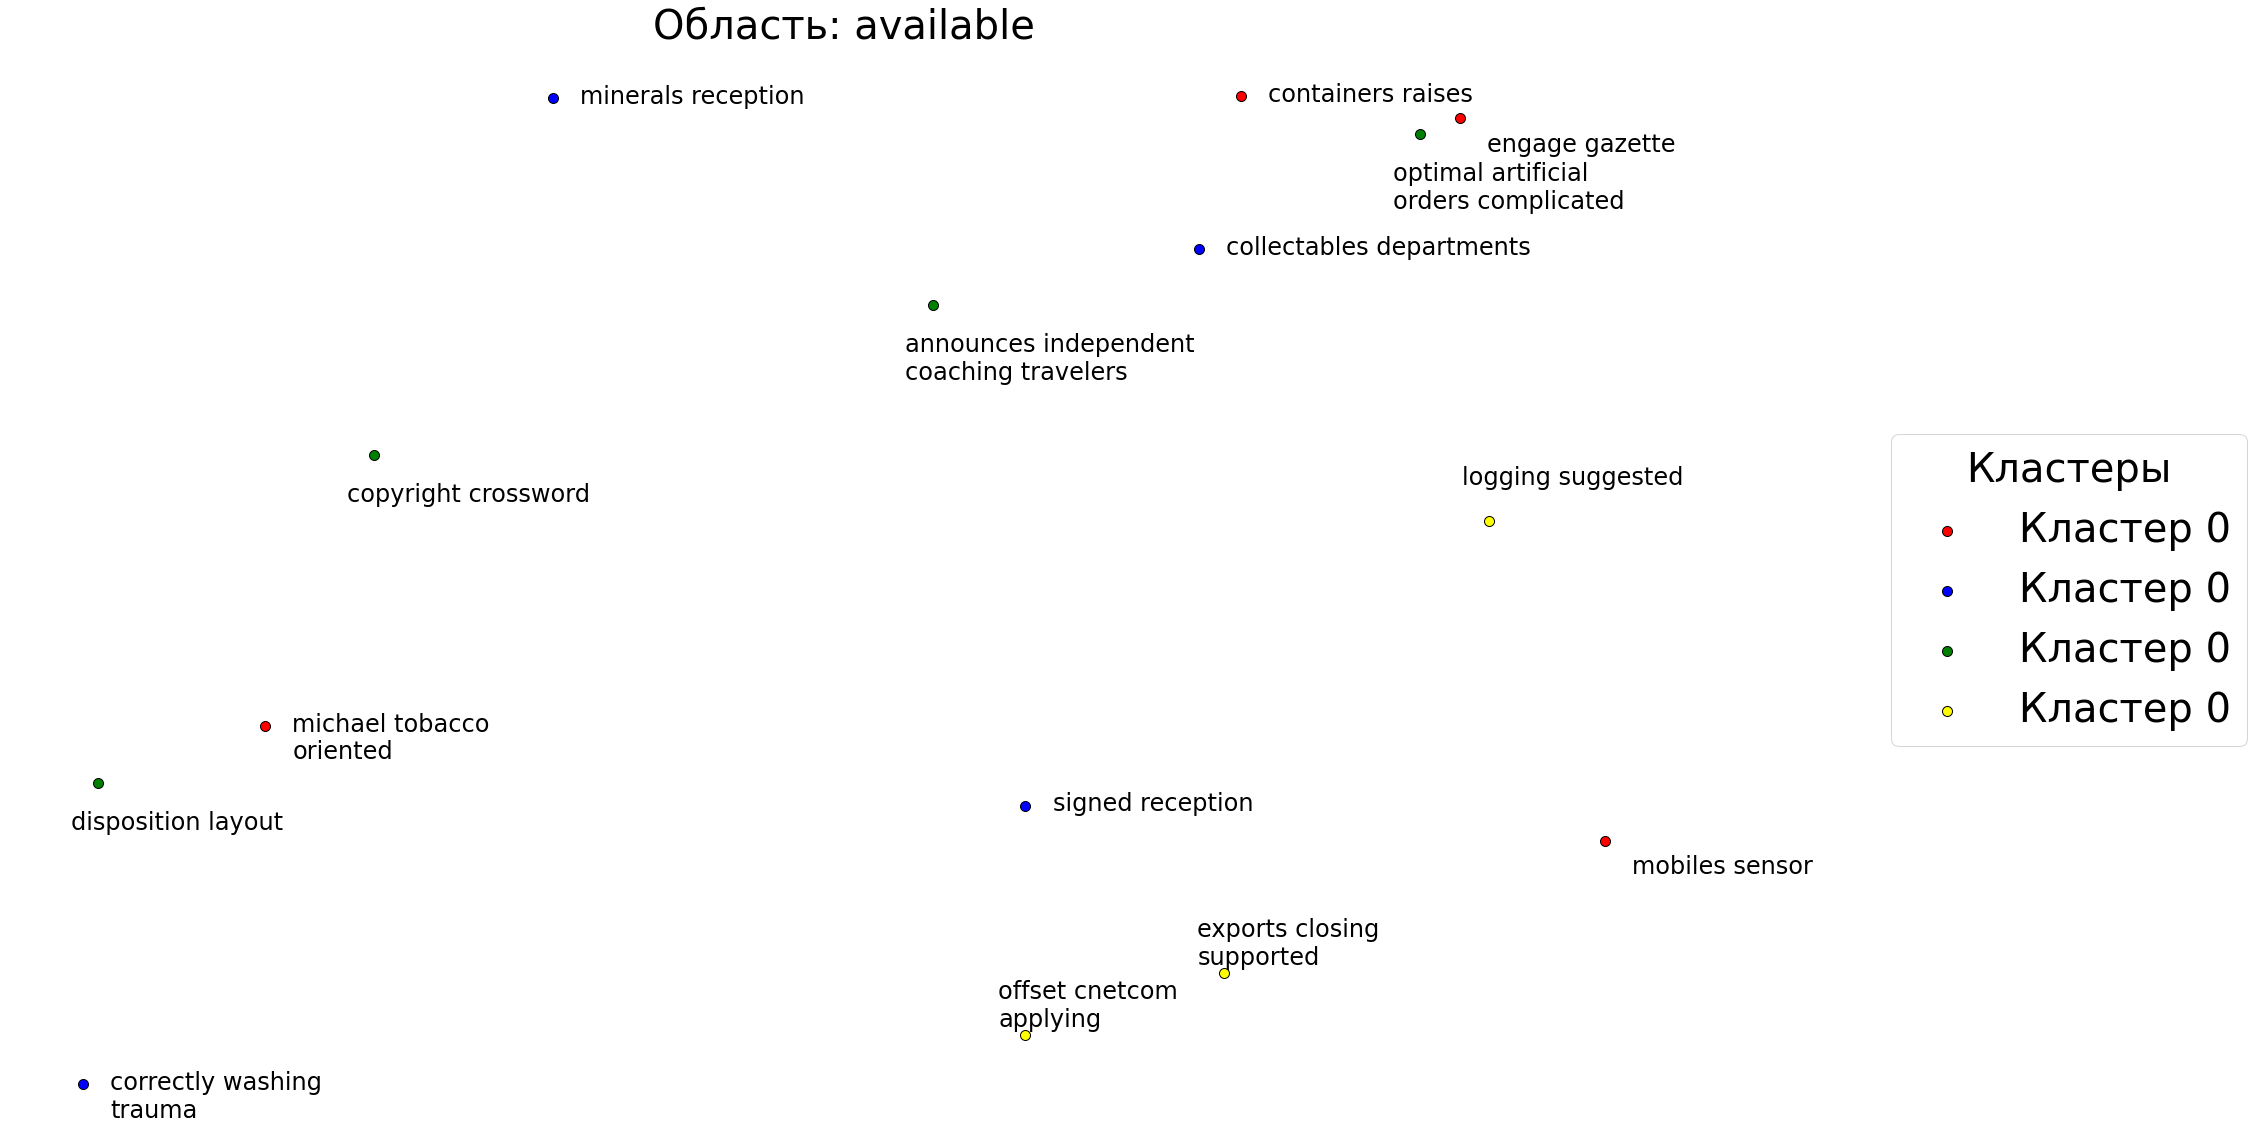

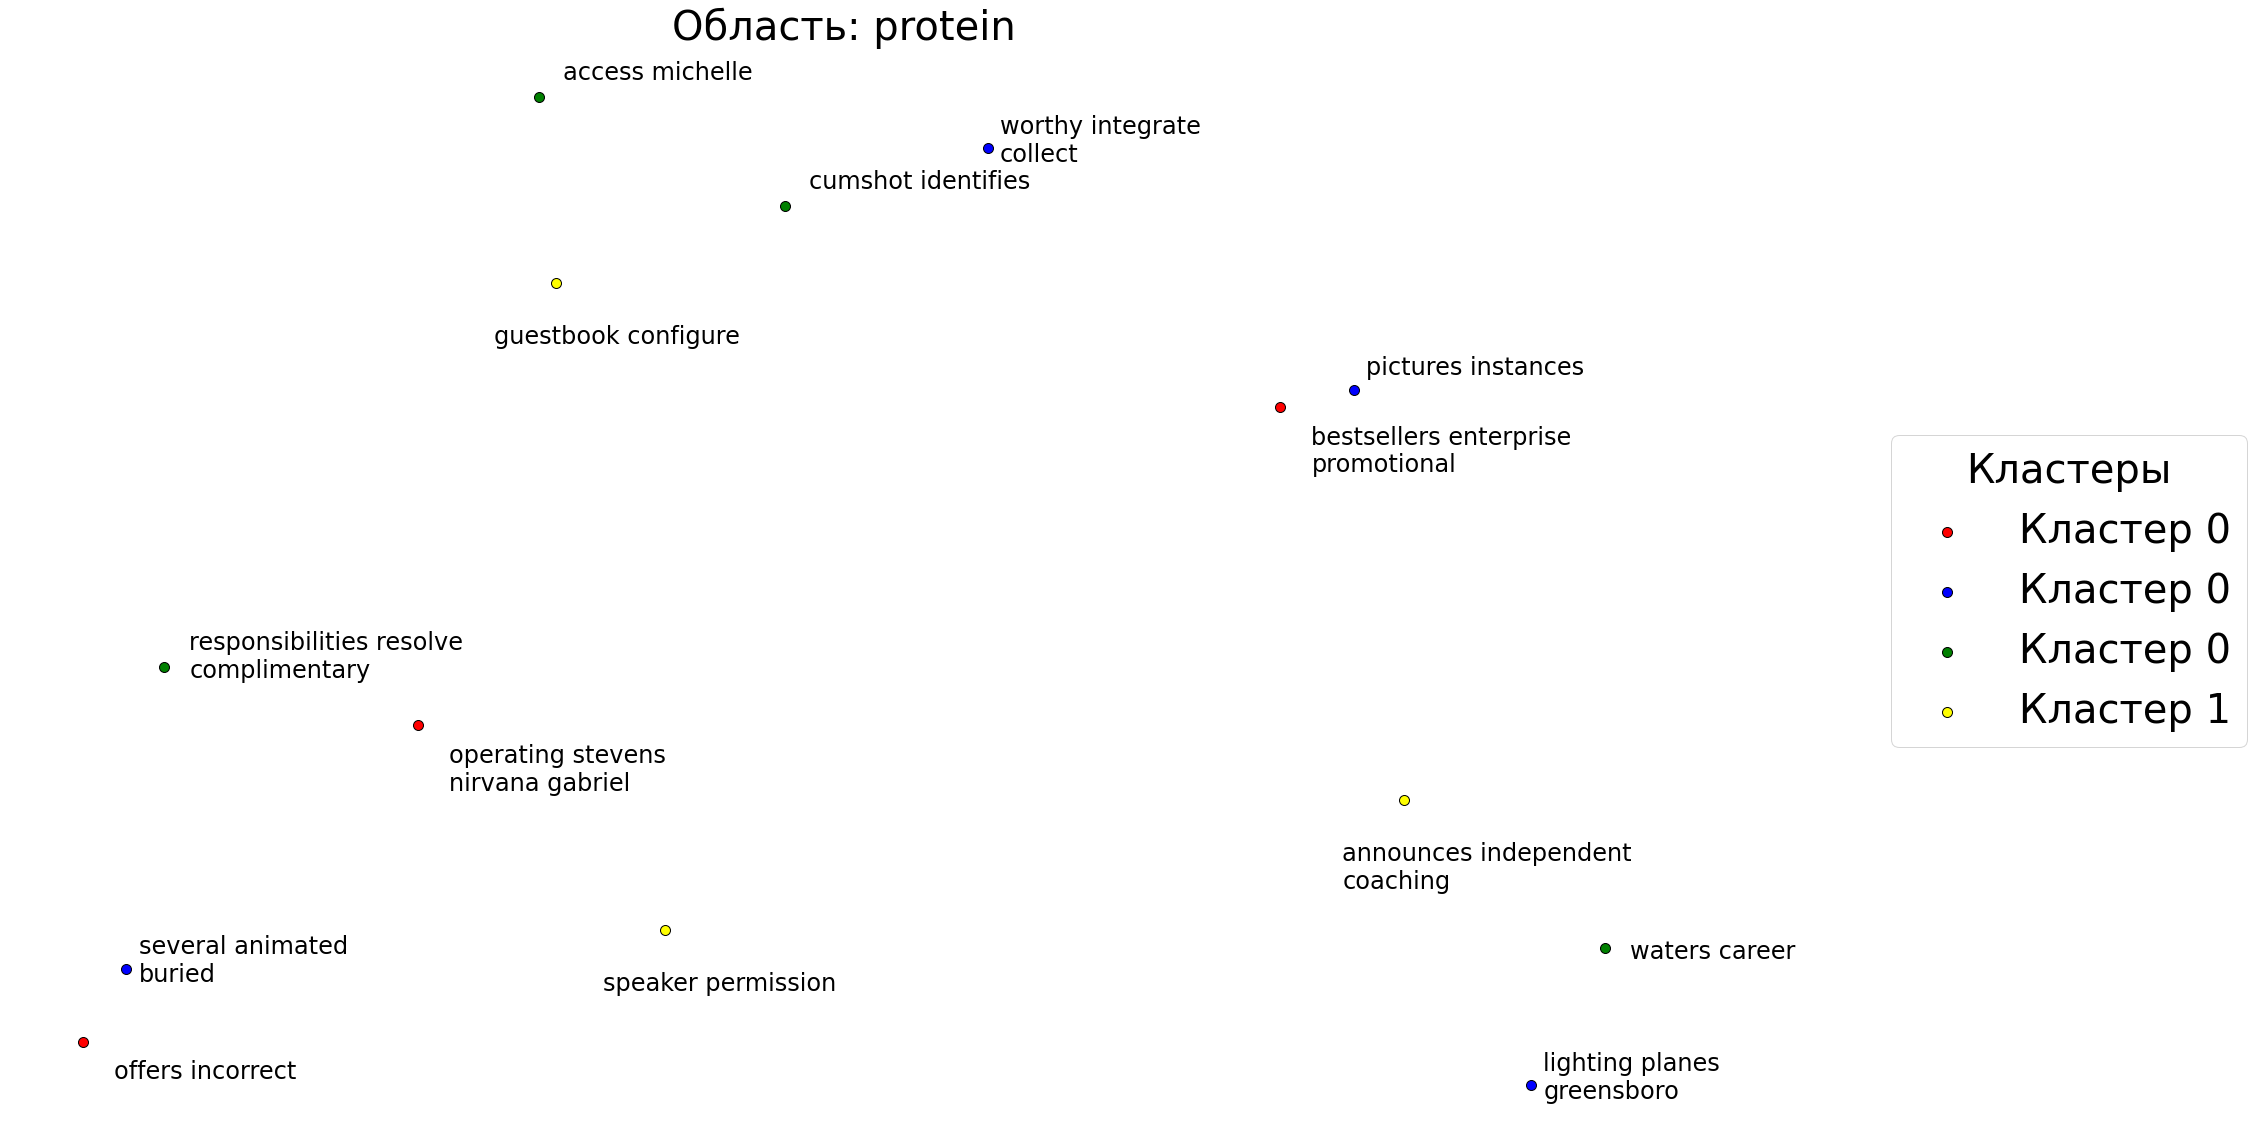

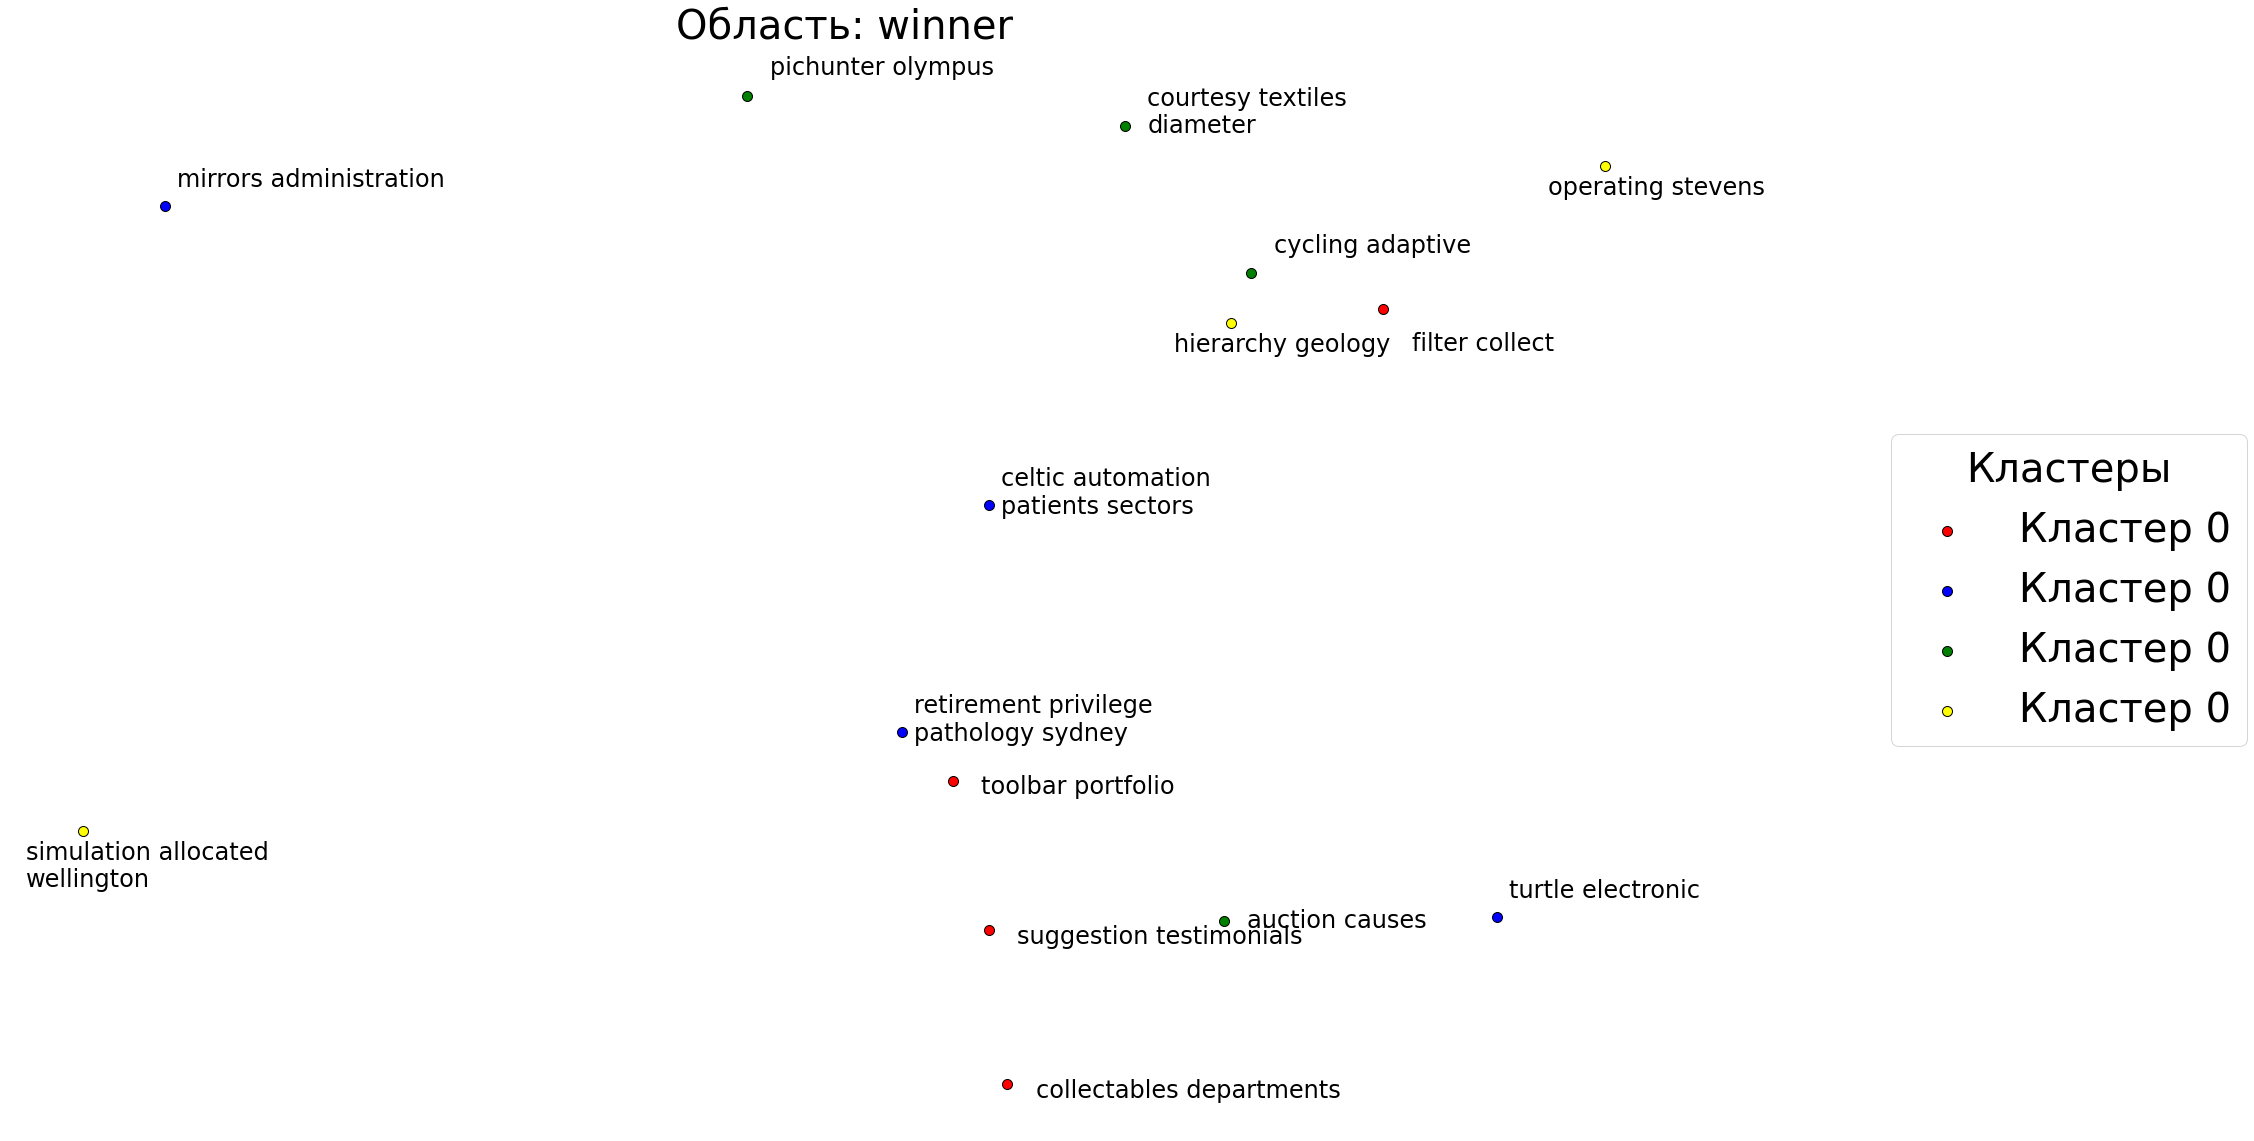

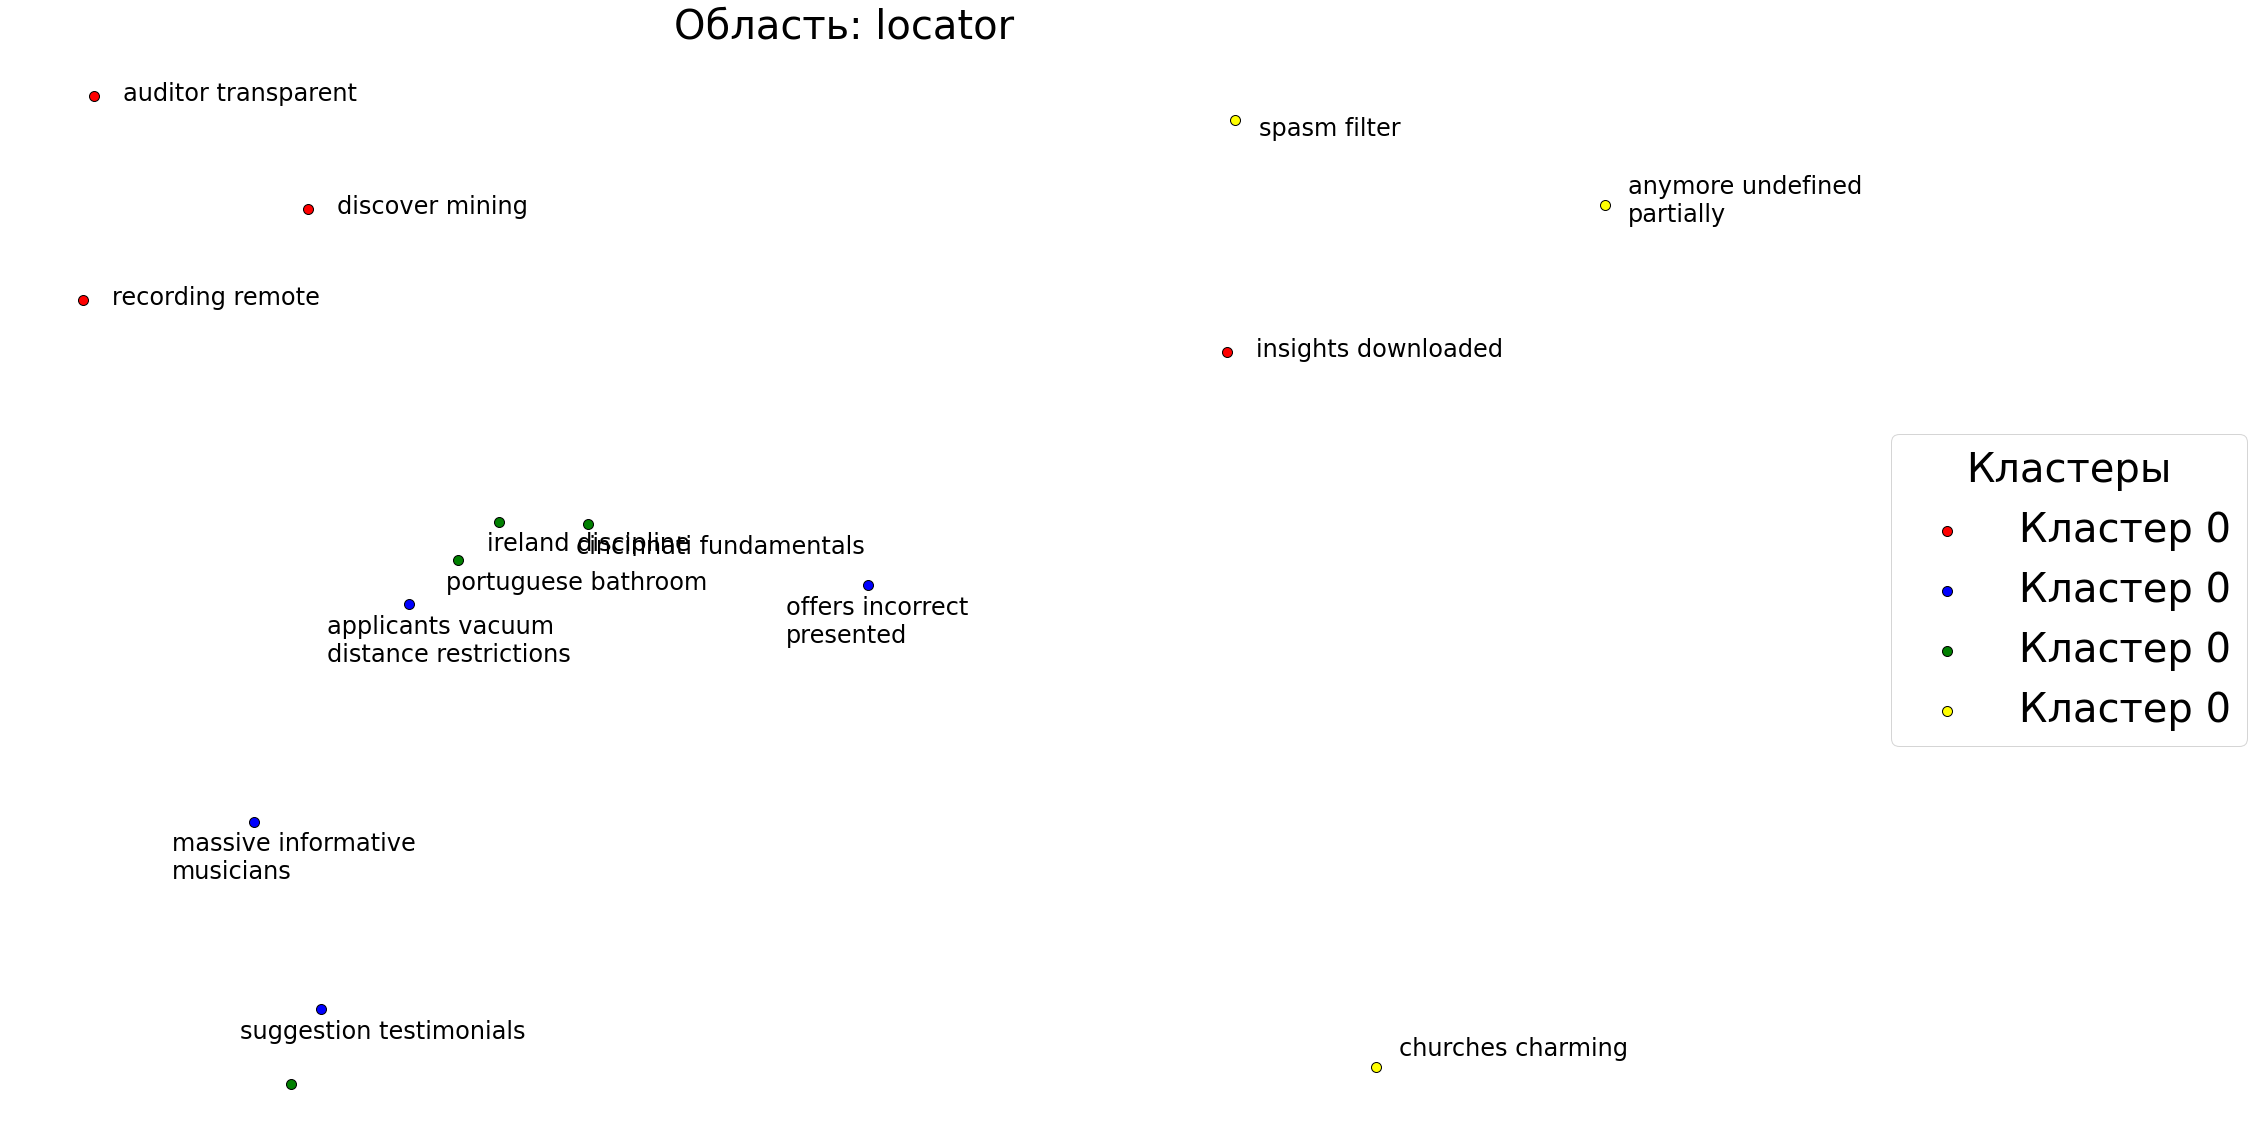

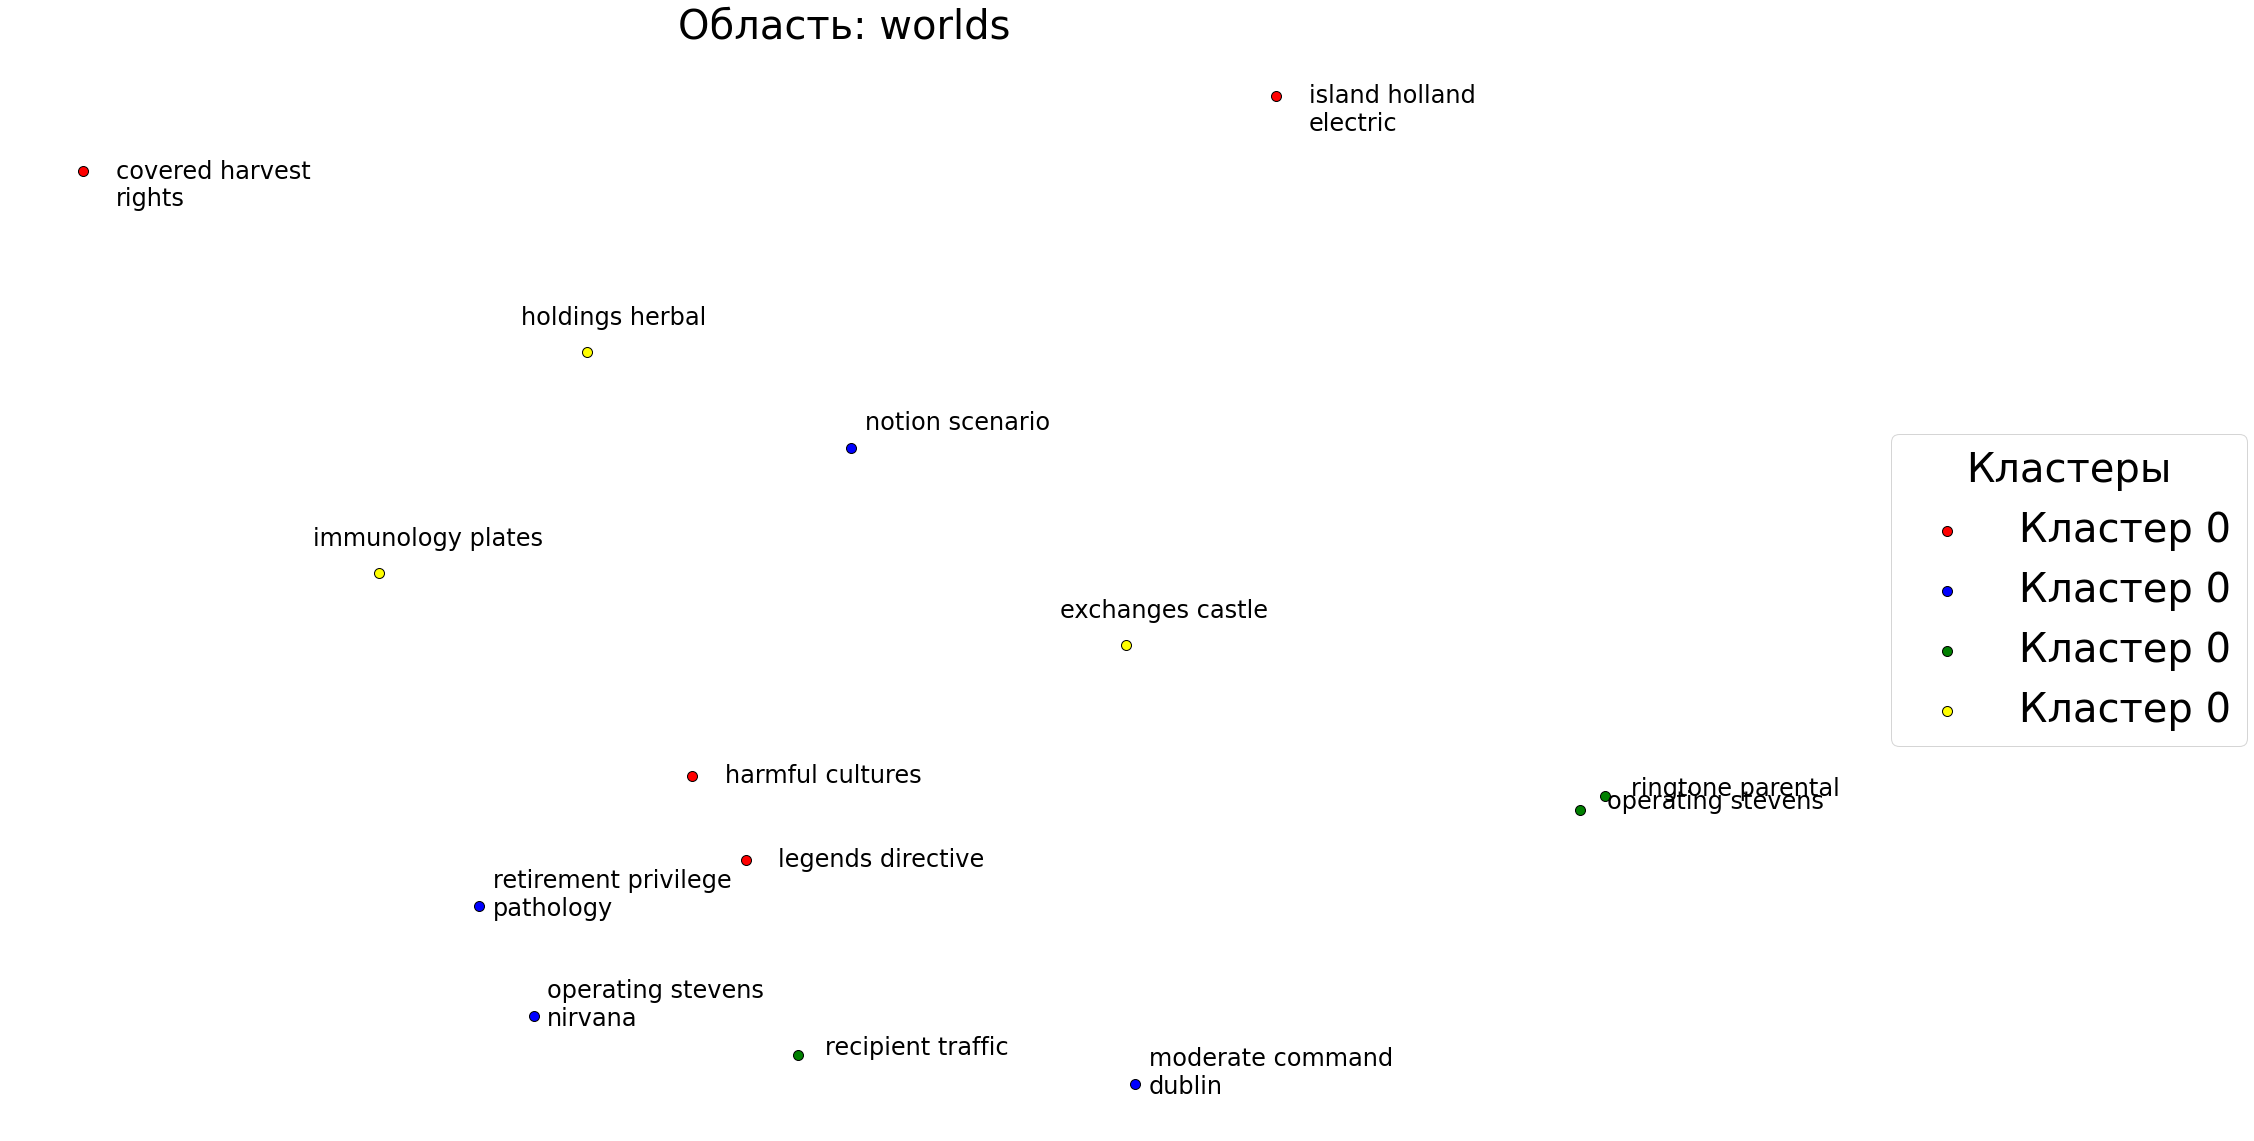

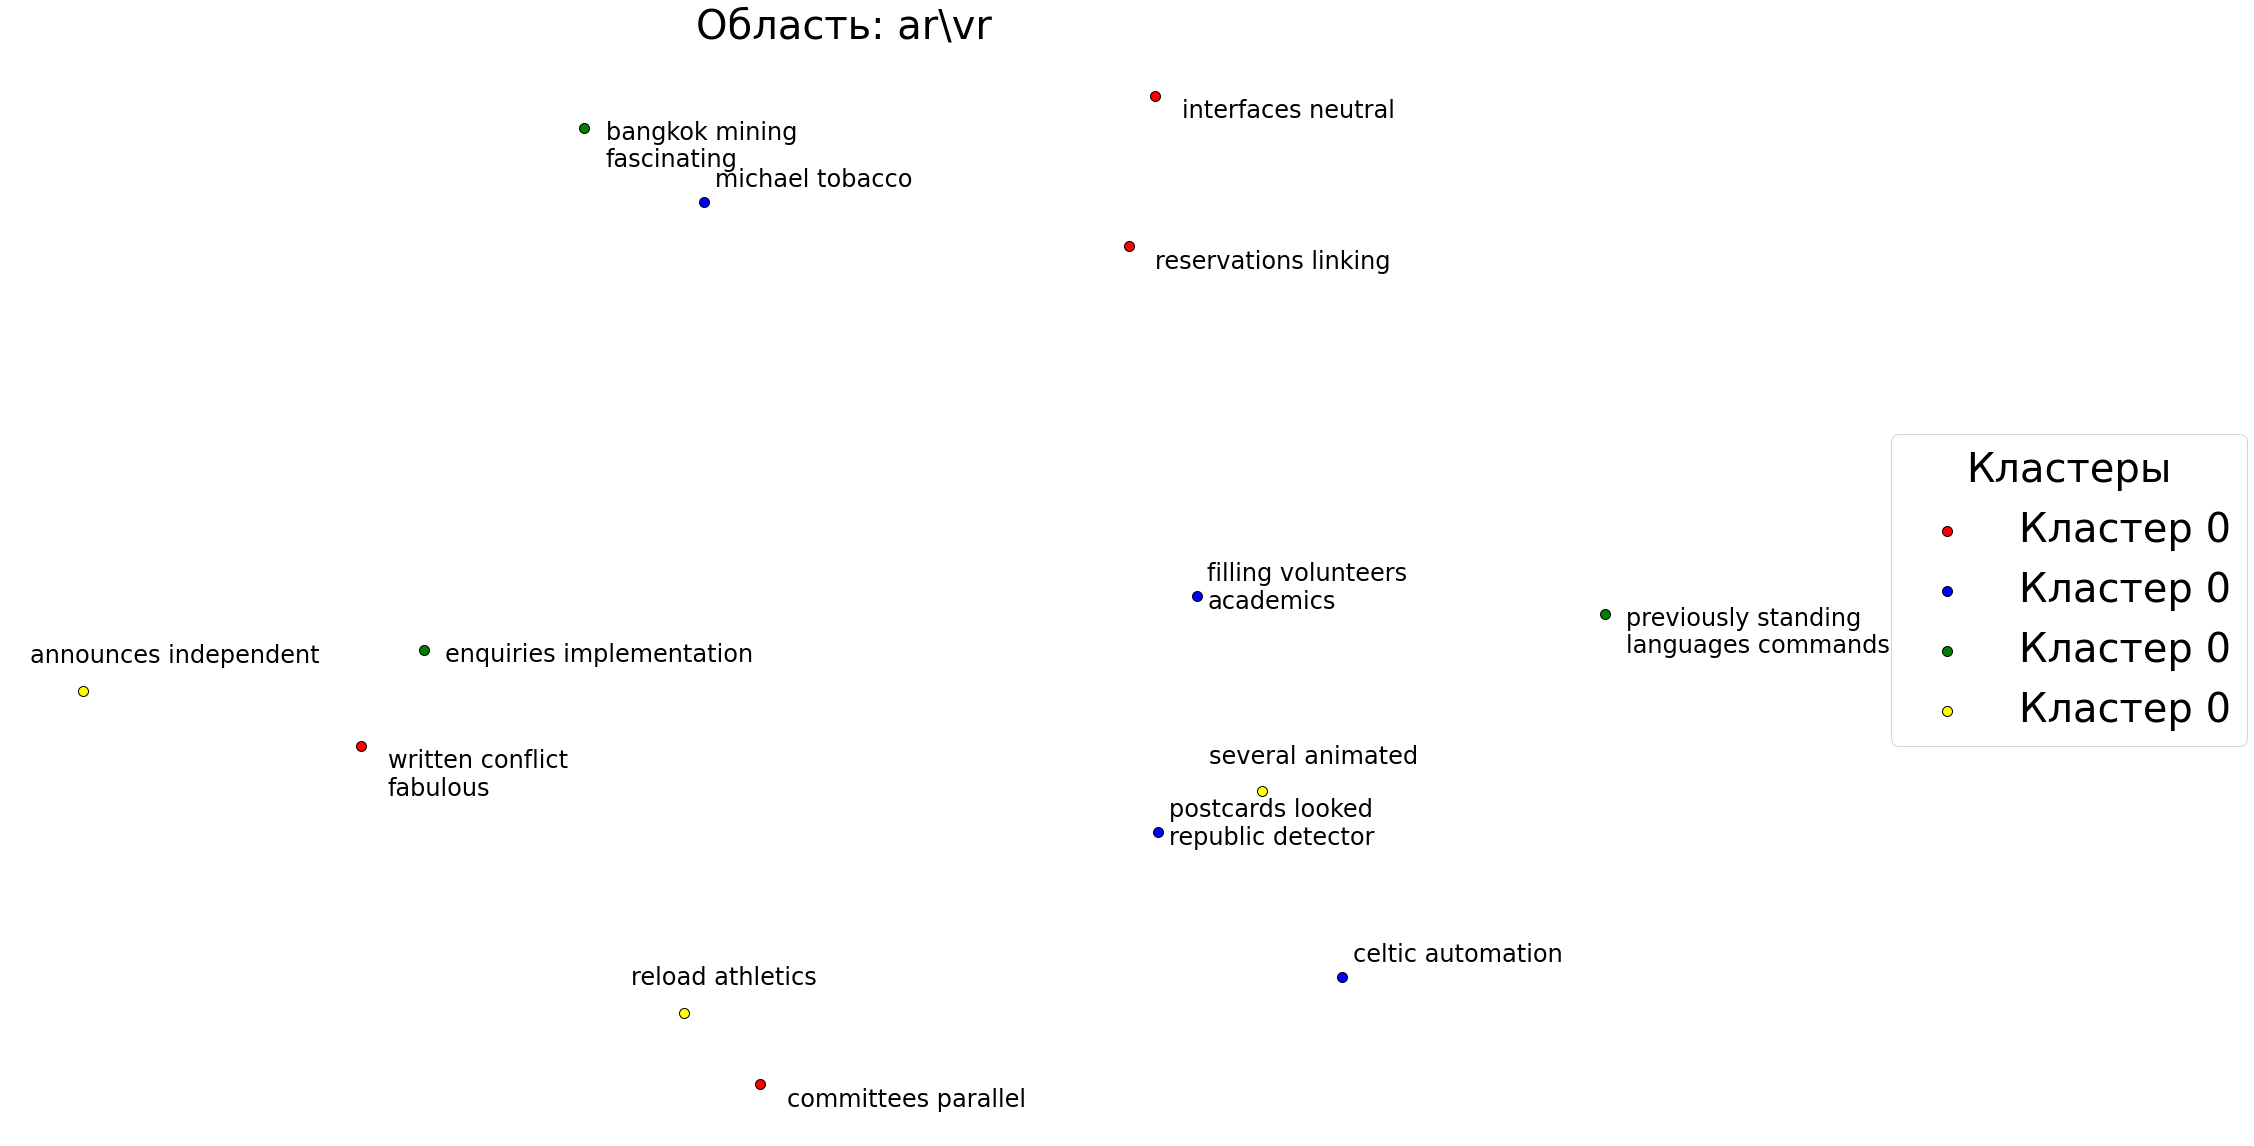

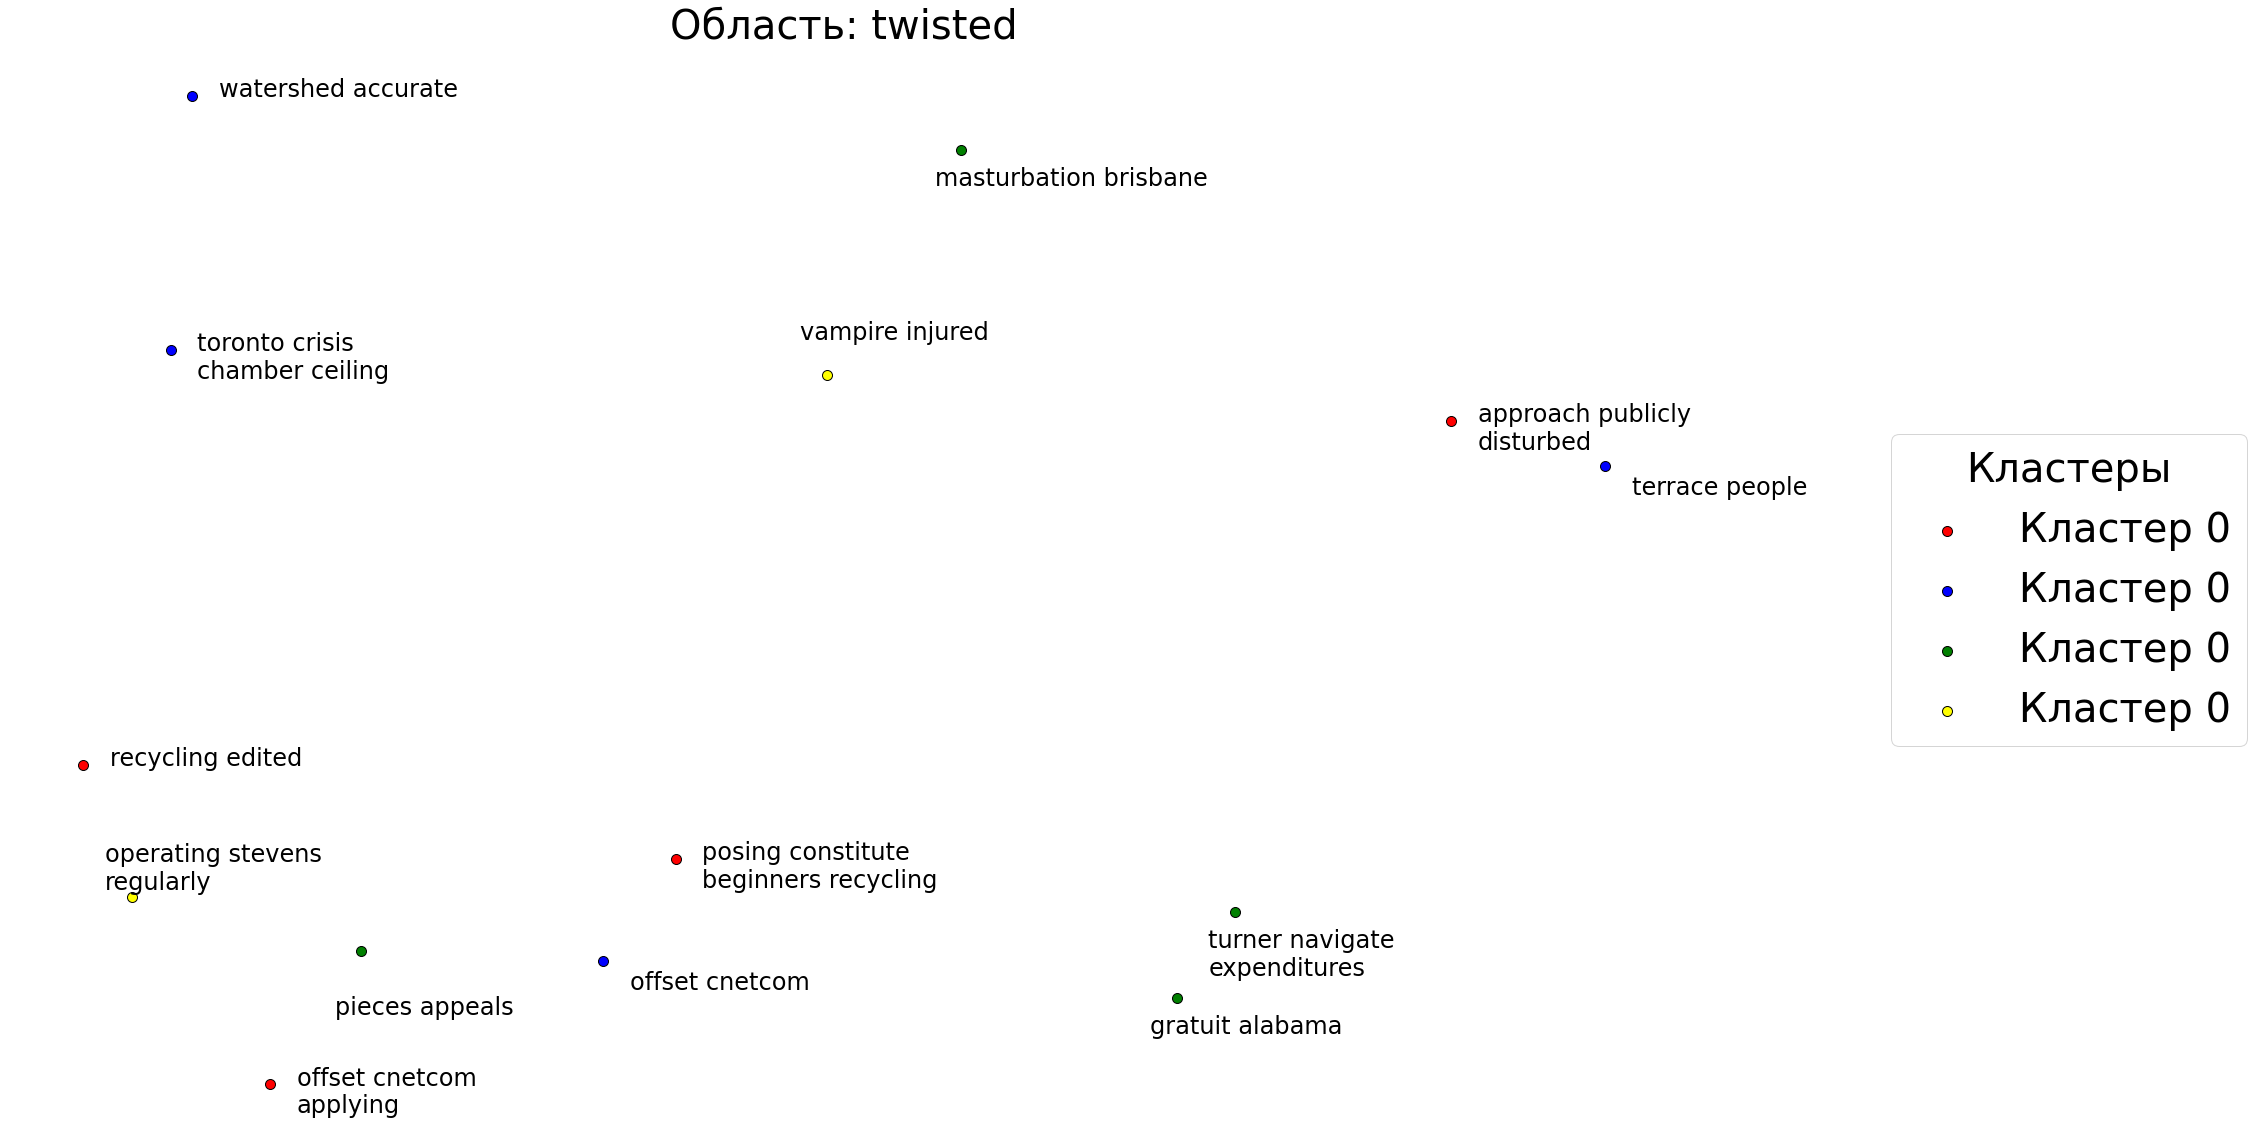

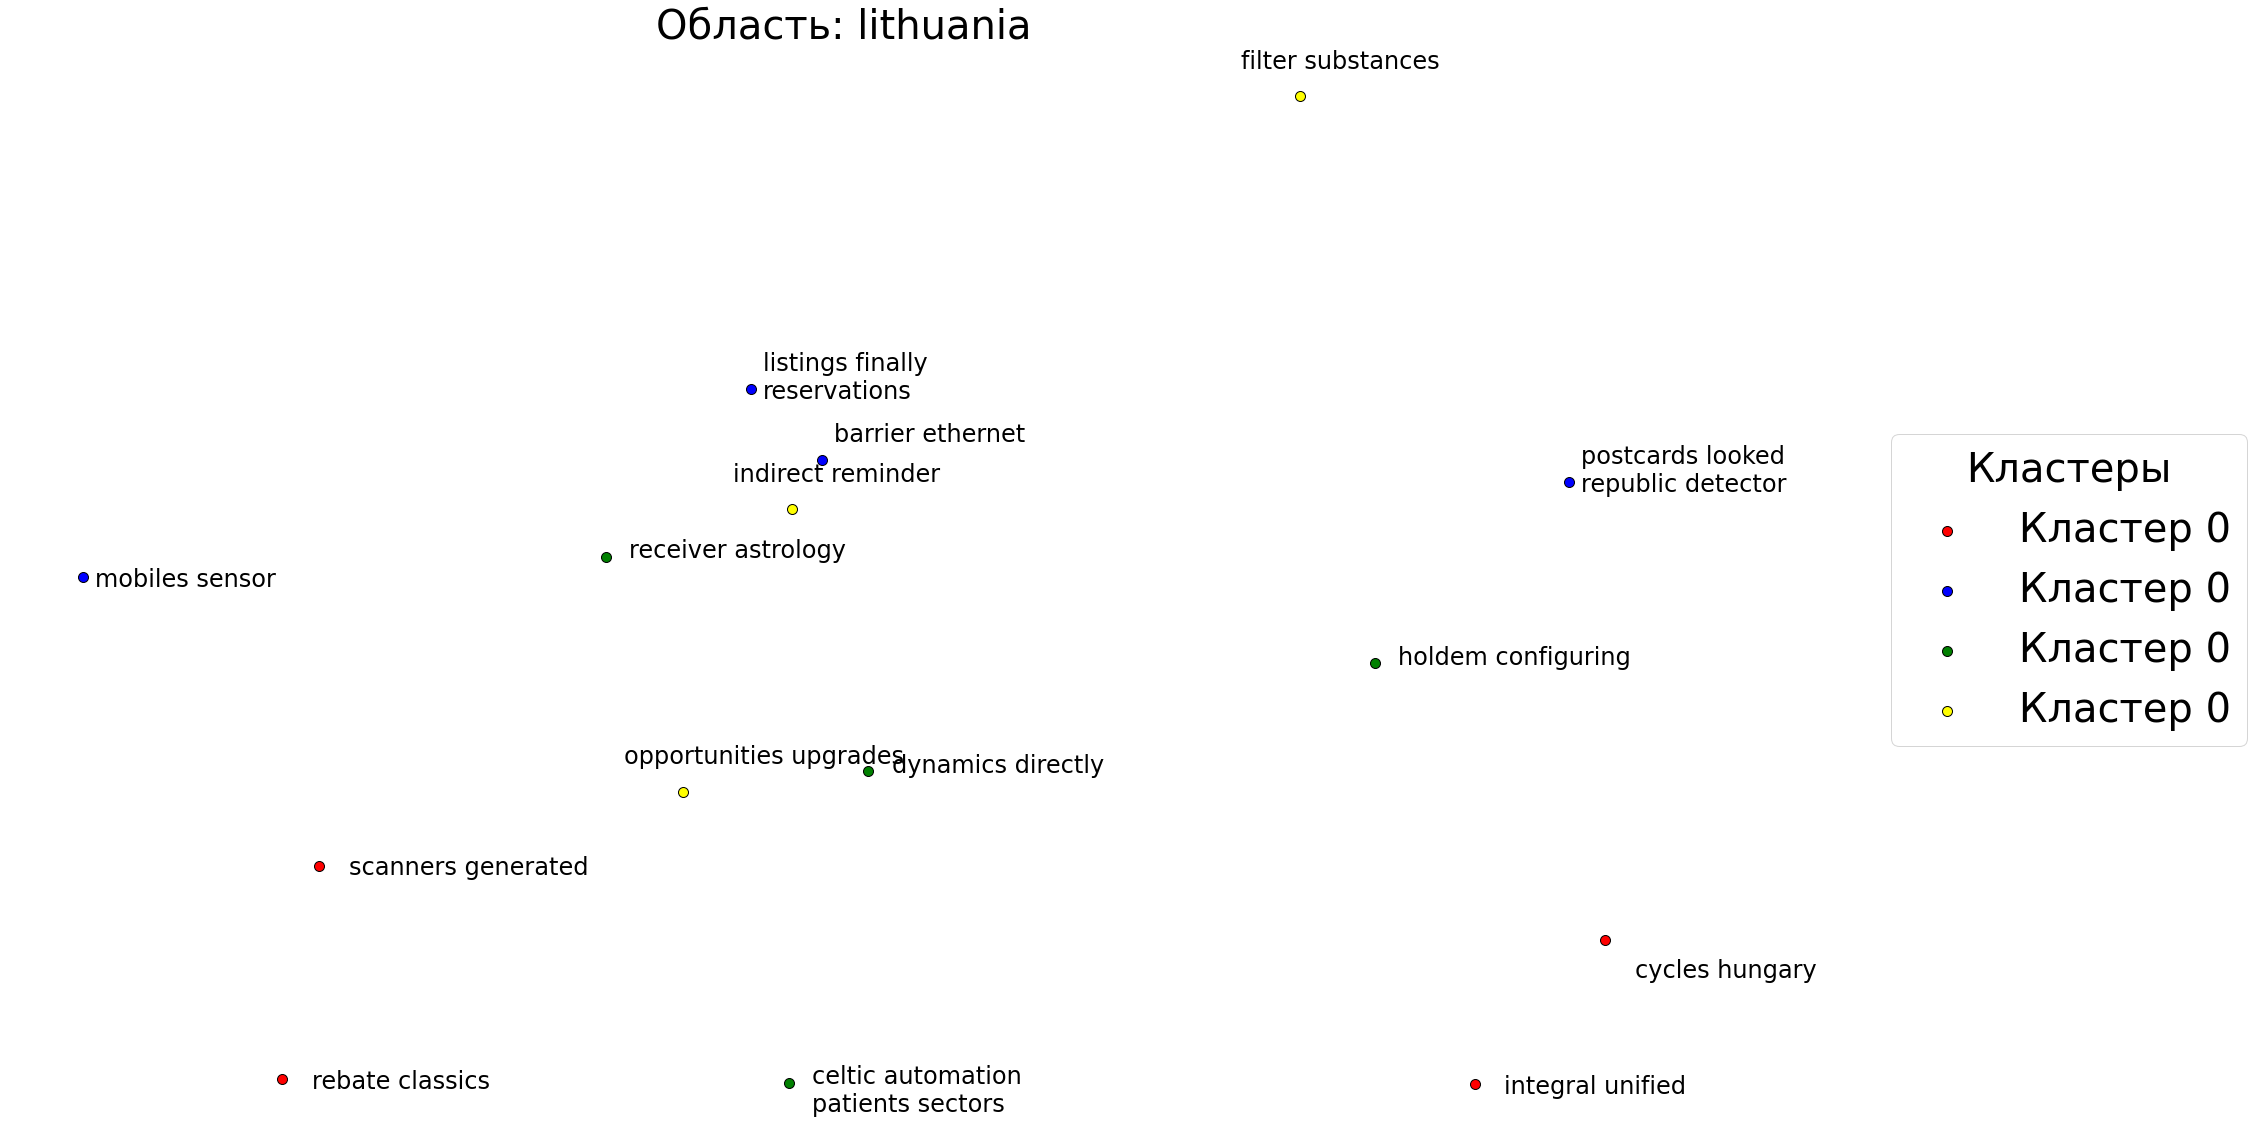

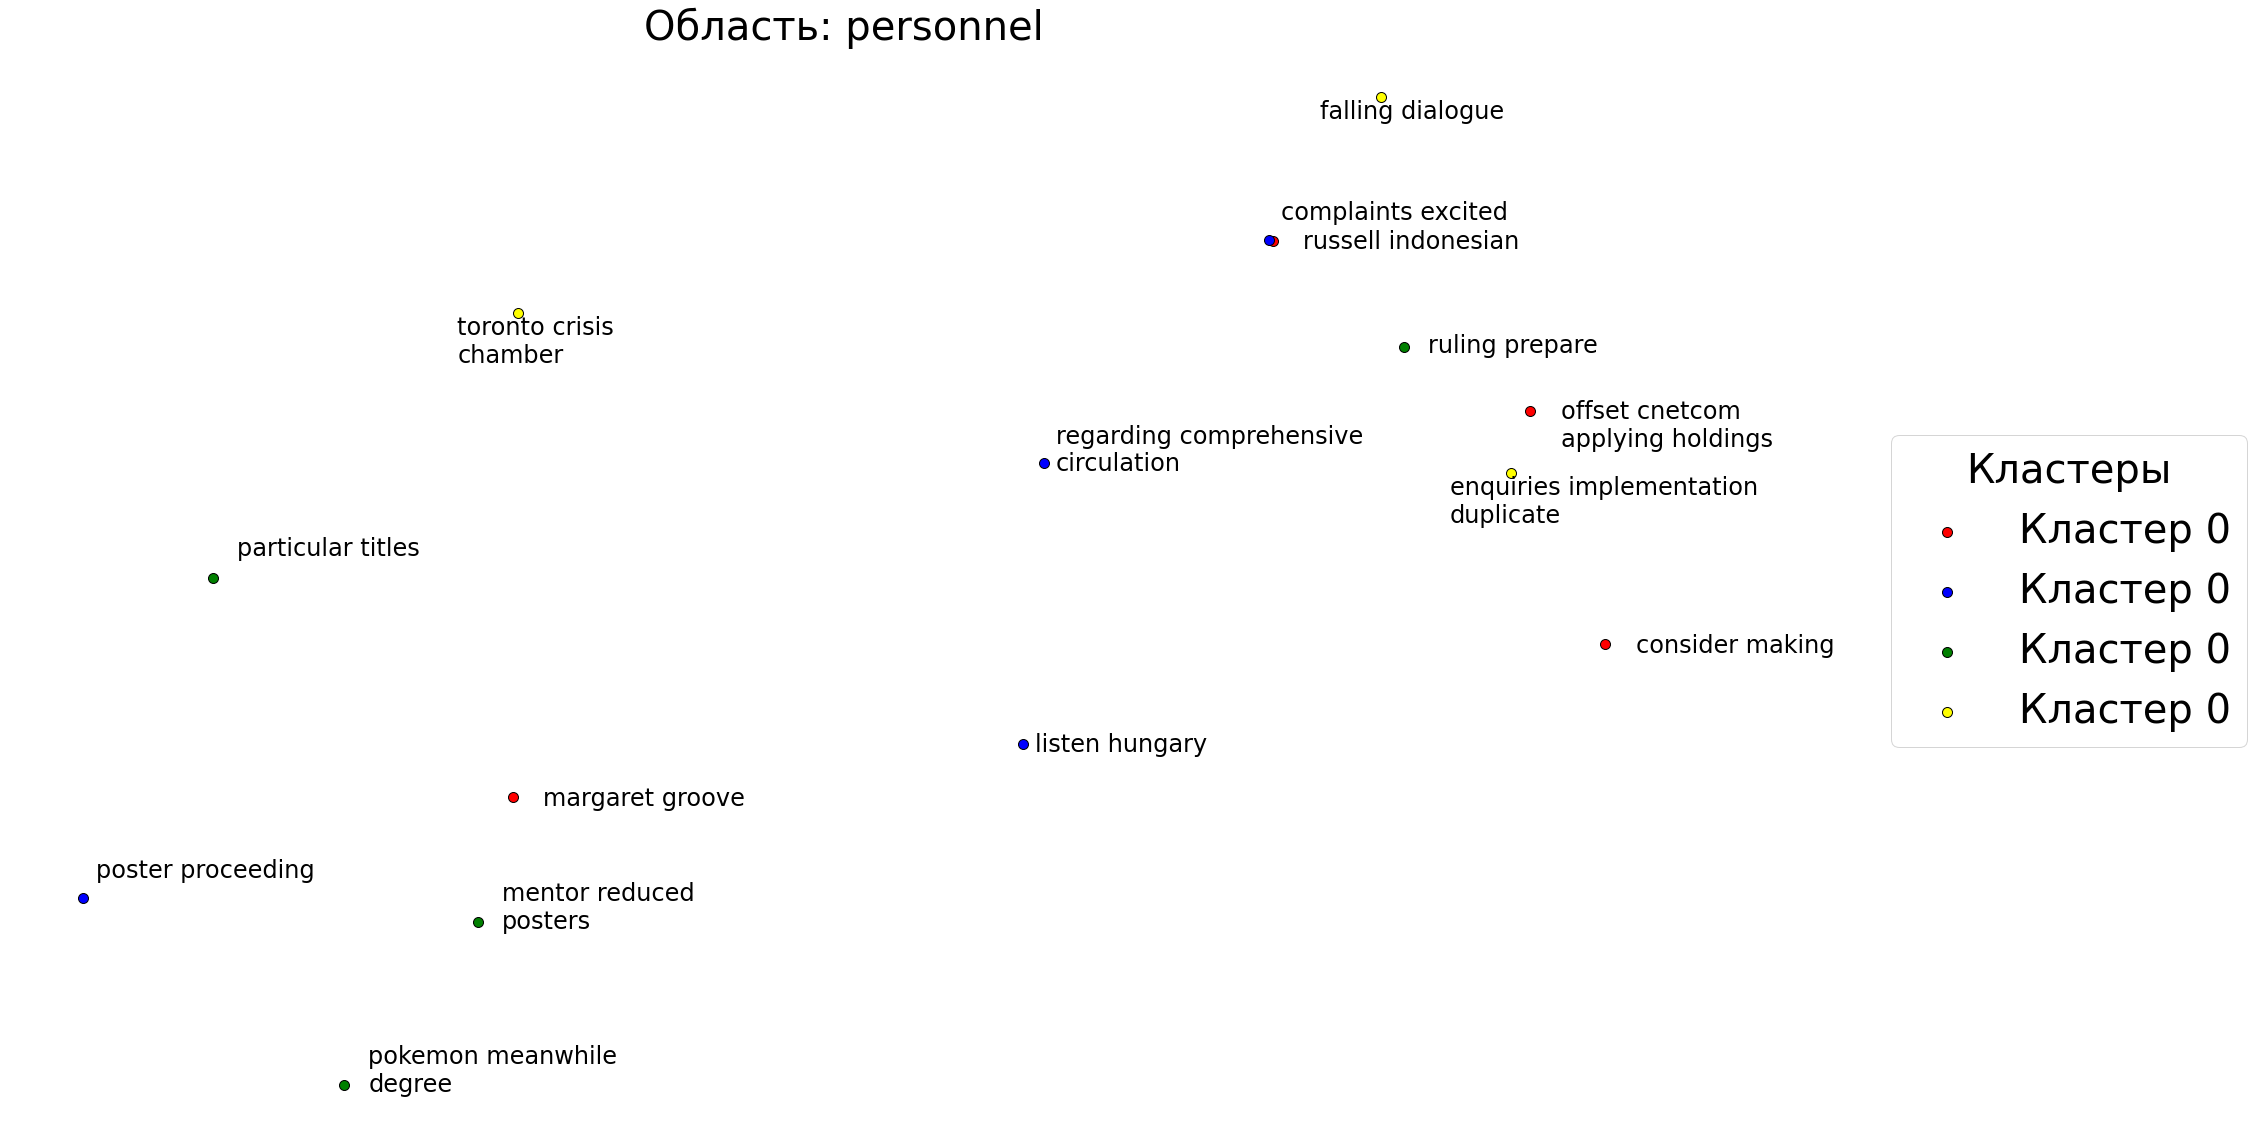

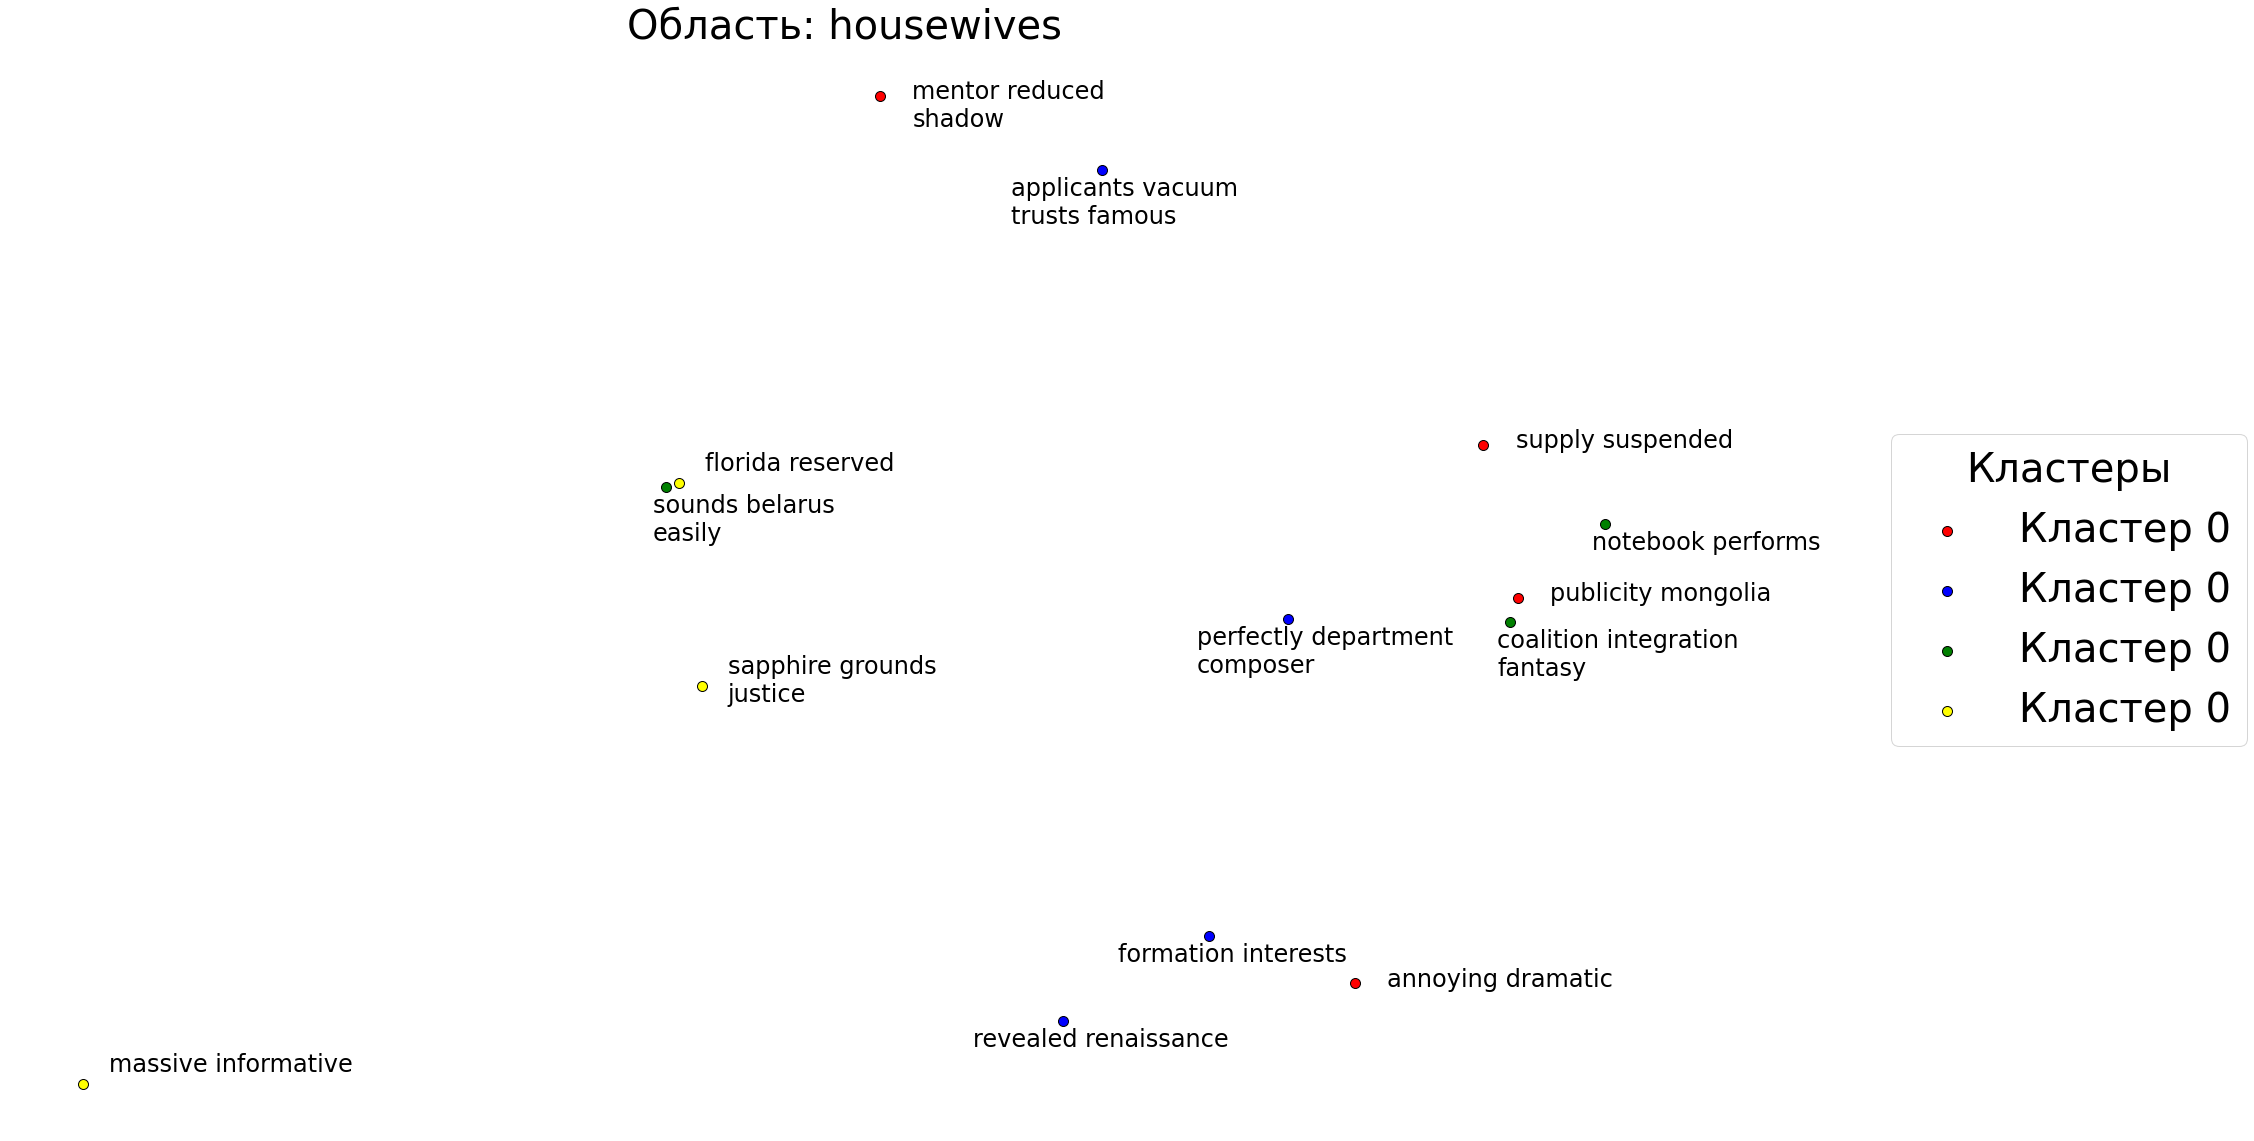

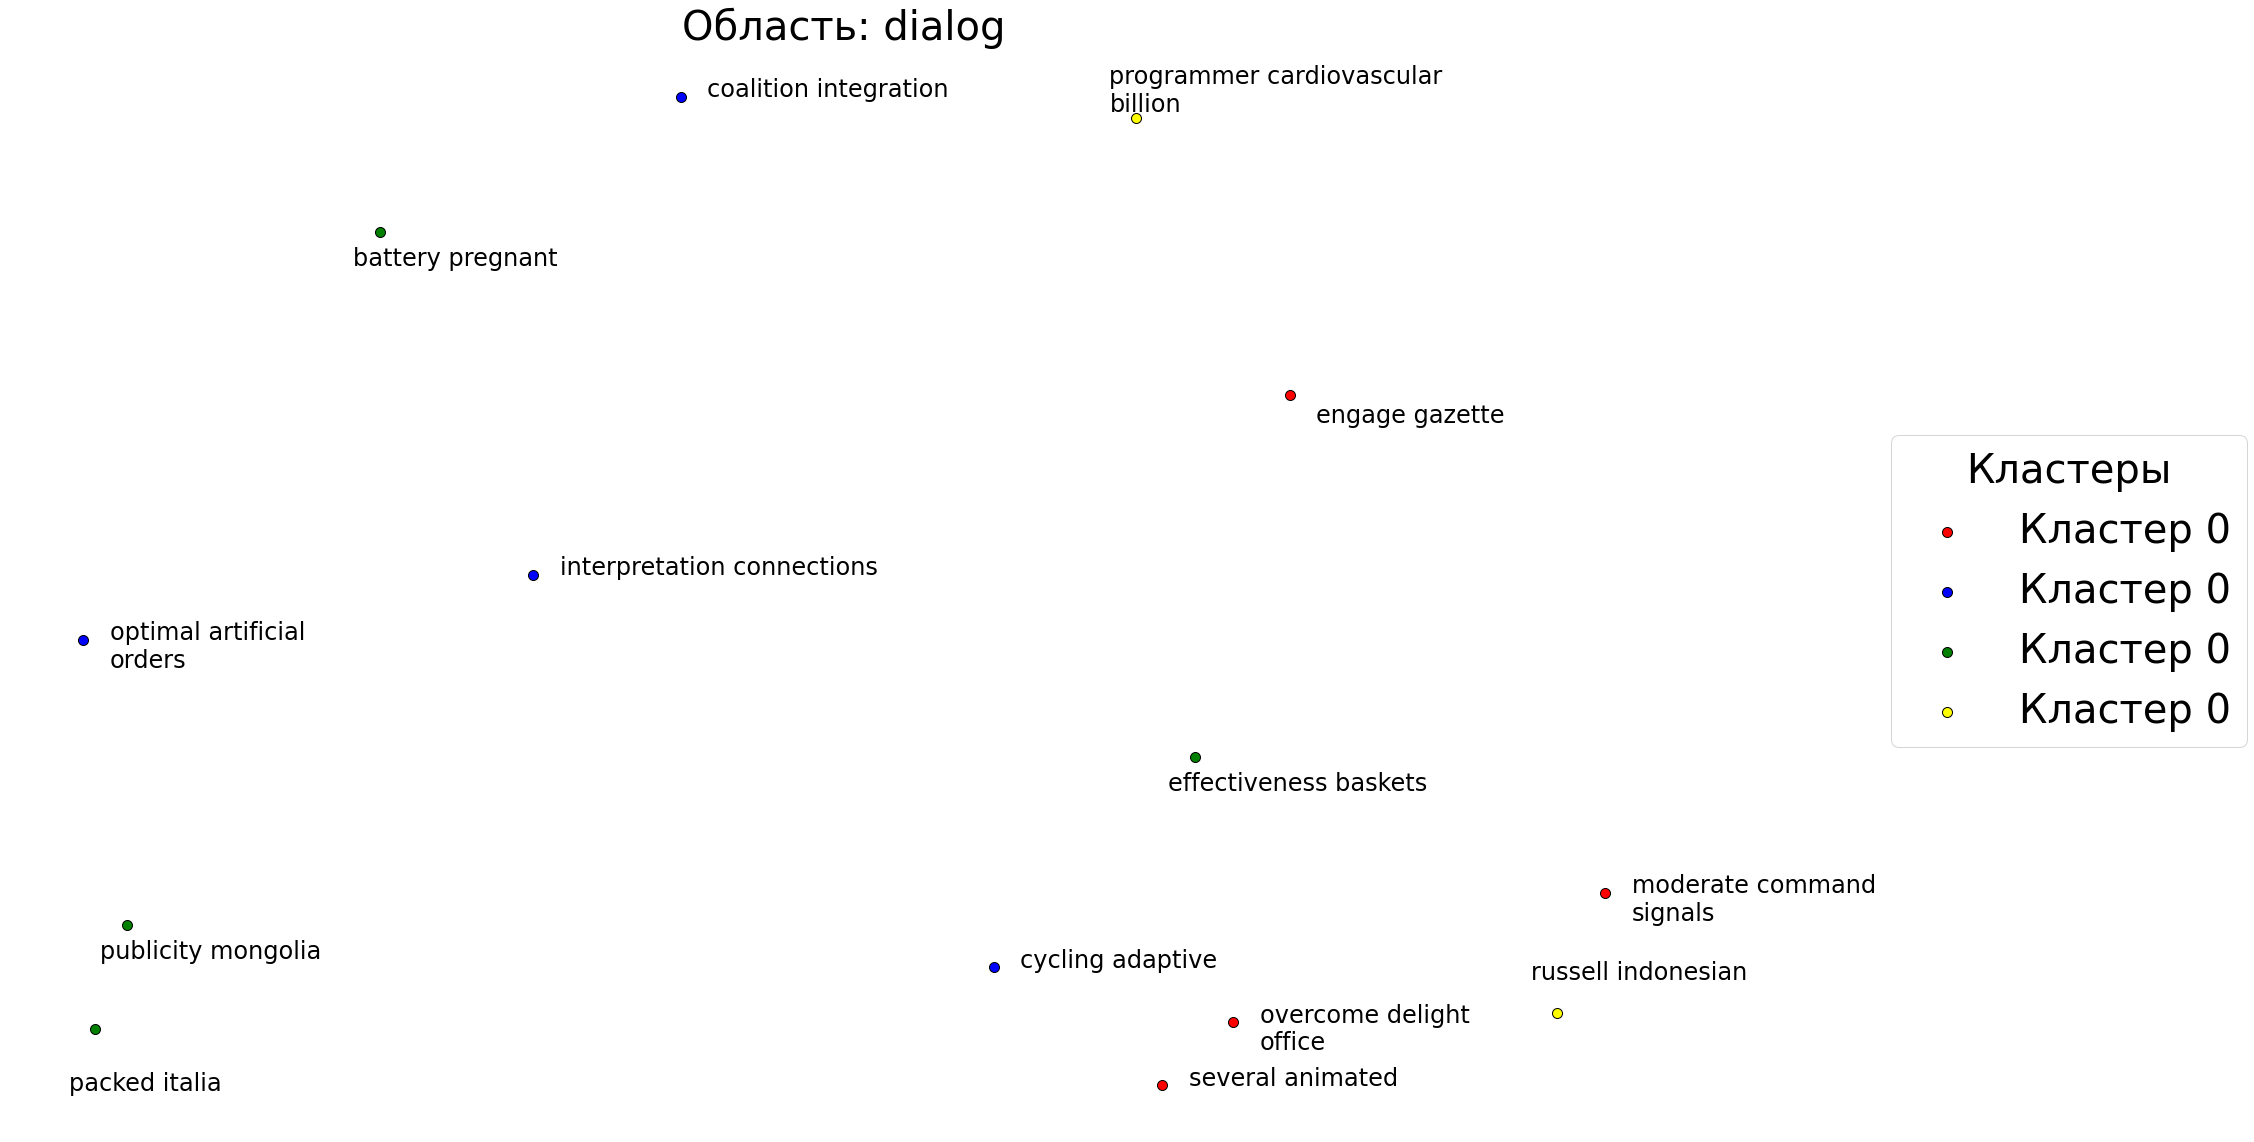

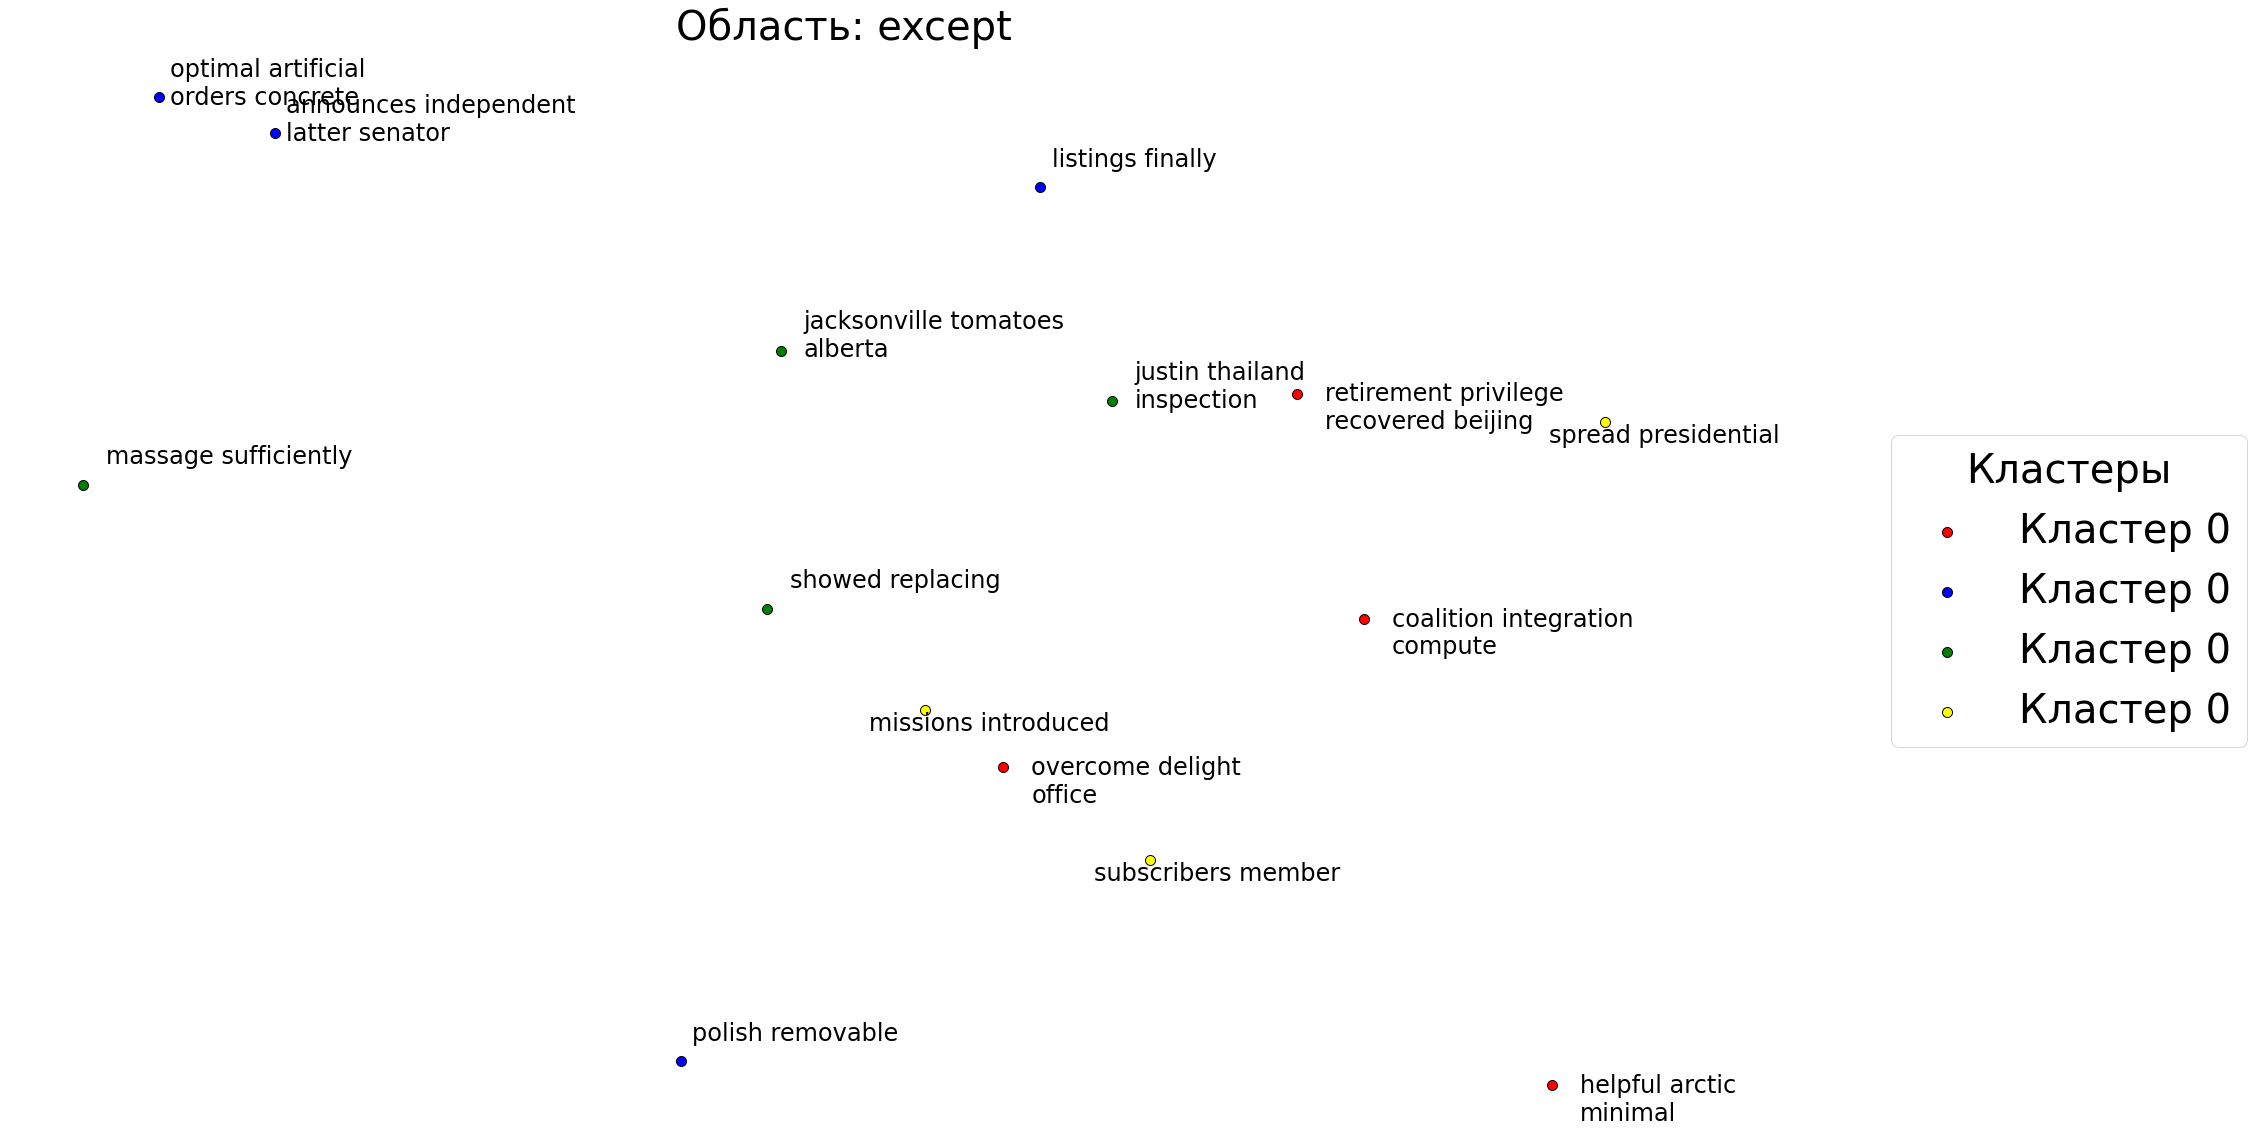

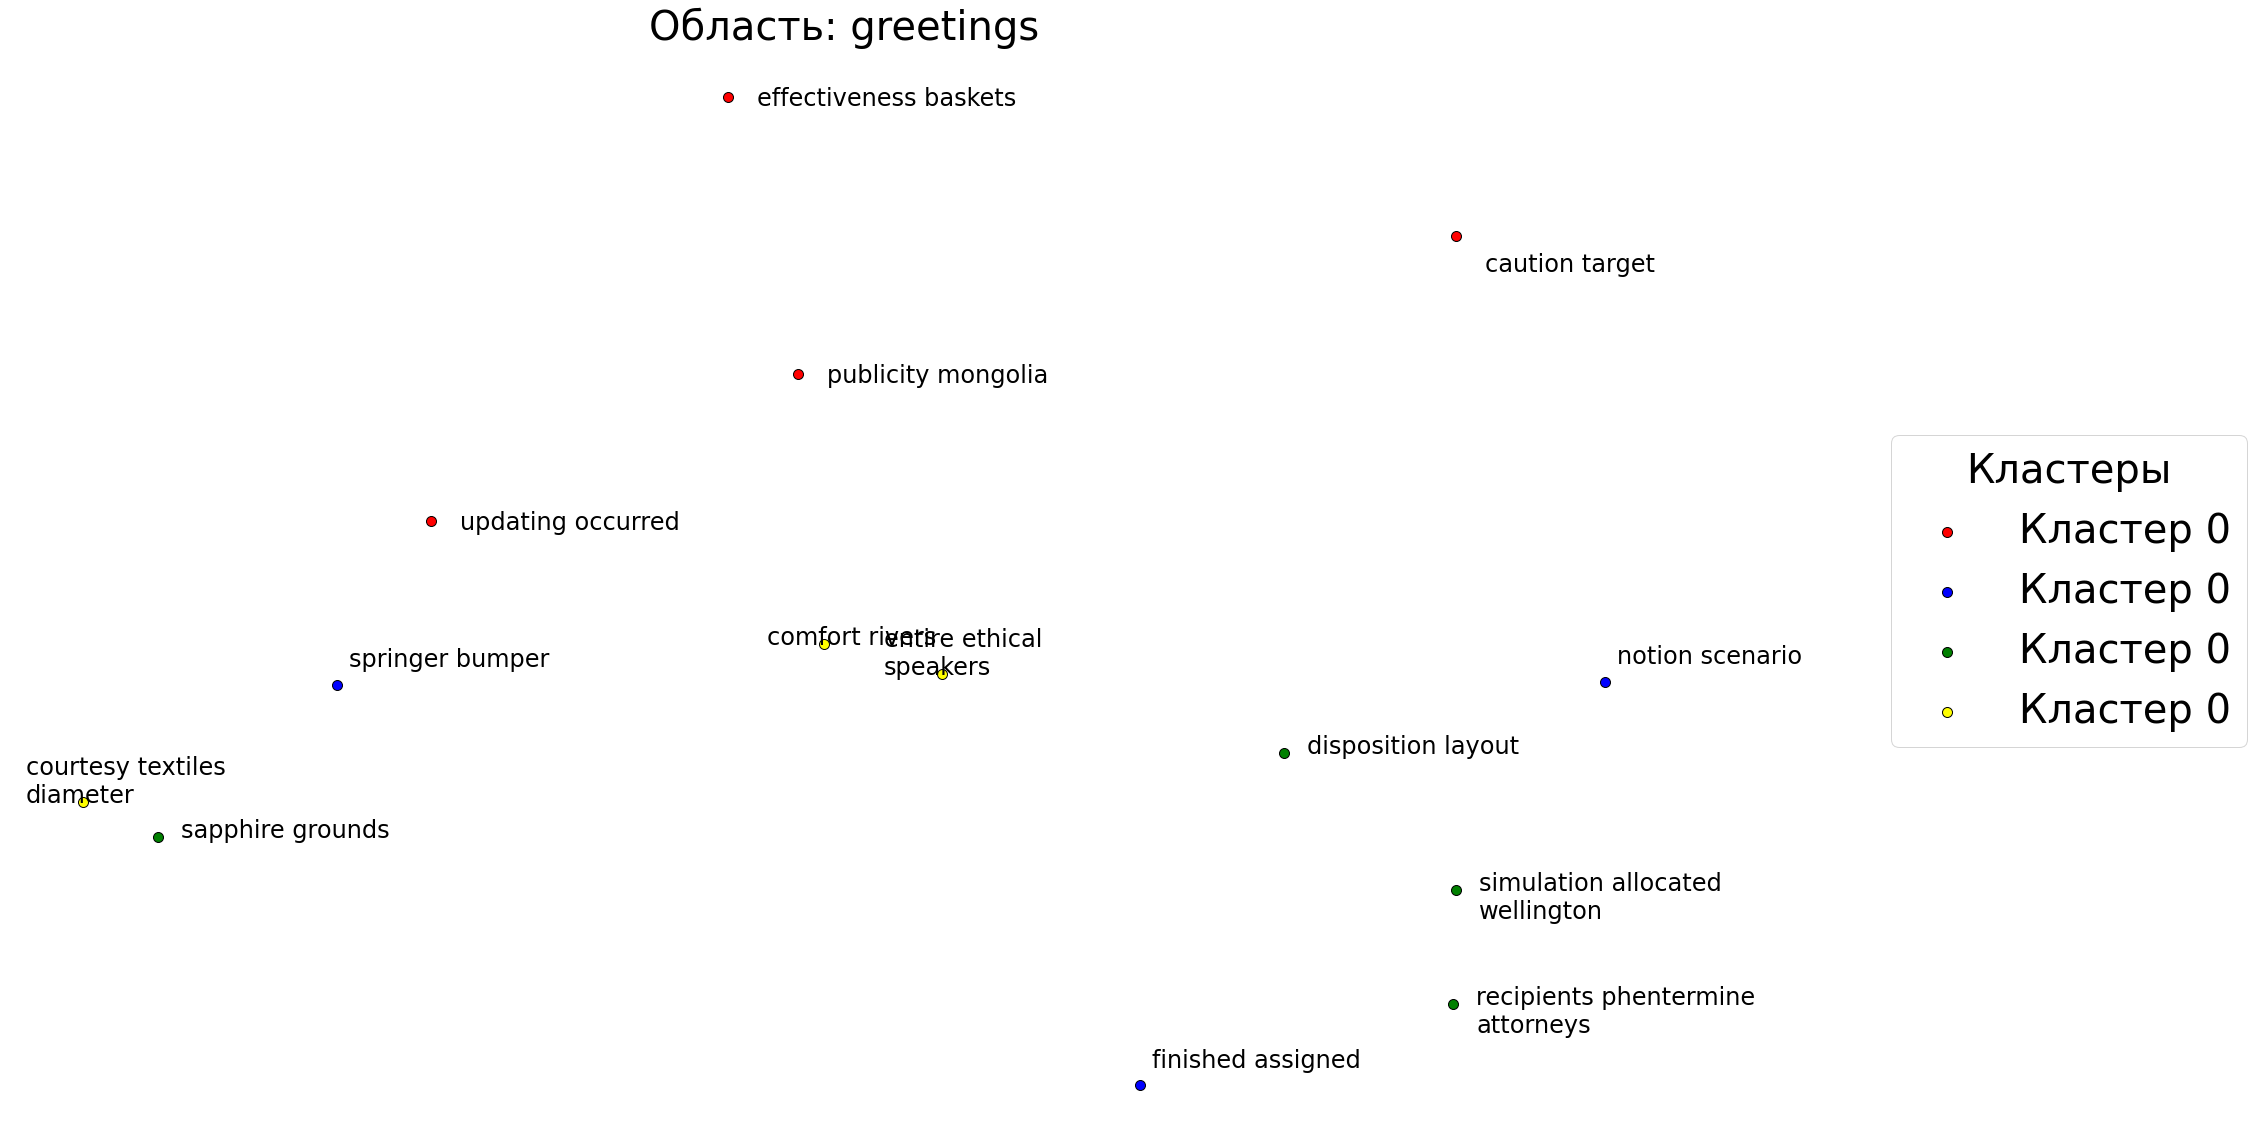

In [5]:
for area in list_area:
    df = data.loc[data['area'] == area]
    list_color = data.color.unique() 
    
    plt.figure(figsize=(30,20)) # создаем график
    plt.title('Область: ' + area, fontsize= 40)
 
    legends = []
    cols = []
    for color in list_color:
        df_cluster = df.loc[df['color'] == color]
        plt.scatter(df_cluster.x , df_cluster.y, c=color, s=100, 
                    marker='o', edgecolors= "black") # обводка точек   
        
        list_ind = df_cluster.index.tolist()
        for ind in list_ind:
            # разбито по переменным просто для легкого восприятия
            text = df_cluster.at[ind, 'keyword']
            if len(text)>=15:
                text = text.split()
                text = ' '.join(text[0:2]) +'\n' +' '.join(text[2:]) 
            x = df_cluster.at[ind, 'x'] 
            y = df_cluster.at[ind, 'y'] 
            if area in group_1: 
                plt.annotate (text,  
                              (x + indent_g_1[color]['x'], y+indent_g_1[color]['y']), 
                              fontsize=24) # подписываем точки
                
            elif area in group_2: 
                plt.annotate (text,  
                              (x + indent_g_2[color]['x'], y+indent_g_2[color]['y']), 
                              fontsize=24) # подписываем точки
            elif area in group_3: 
                plt.annotate (text,  
                              (x + indent_g_3[color]['x'], y+indent_g_3[color]['y']), 
                              fontsize=24) # подписываем точки
            else: 
                plt.annotate (text,  
                              (x + indent_g_4[color]['x'], y+indent_g_4[color]['y']), 
                              fontsize=24) # подписываем точки
                
    # выносим легенду за груфик
    plt.legend(df.cluster_name.tolist(), 
               loc='center right', 
               title='Кластеры', 
               fontsize= 40, 
               title_fontsize=40, 
               bbox_to_anchor=( 1.35 , 0.5 ))
    plt.axis('off') # убирает границы
    
    if area=='ar\\vr': name='ar_vr.png'
    else: name = area + '.png'
    plt.savefig('img\\'+ name, dpi = 150, bbox_inches='tight') # сохраняем ихображения в папке